In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('2018_pulled_features_plusfour.csv', index_col='timestamp', parse_dates=True)

In [45]:
df.head(2)

station_id  bikes  spaces  total_docks  bike_lag  \
timestamp                                                               
2017-06-01 00:00:01           1      0      31           31         0   
2017-06-01 00:00:01          82     22       0           22         4   

                     bike_lag2  bike_lag3  bike_lag4  deposit  hour  \
timestamp                                                             
2017-06-01 00:00:01          0          0          0        0     0   
2017-06-01 00:00:01          4          4          4       18     0   

                     day_of_week  month  weekend  bike_pull4  
timestamp                                                     
2017-06-01 00:00:01            3      6        0           0  
2017-06-01 00:00:01            3      6        0          22

In [5]:
df.describe()

tfl_id         bikes        spaces   total_docks
count  2.790040e+07  2.790040e+07  2.790040e+07  2.790040e+07
mean   5.229972e+01  1.258310e+01  1.871186e+01  3.136877e+01
std    2.989625e+01  1.134922e+01  1.190888e+01  7.526243e+00
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    2.700000e+01  2.000000e+00  9.000000e+00  2.700000e+01
50%    5.300000e+01  1.000000e+01  1.900000e+01  3.000000e+01
75%    7.800000e+01  2.100000e+01  2.900000e+01  4.000000e+01
max    1.120000e+02  4.300000e+01  5.200000e+01  4.000000e+01

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27900395 entries, 2017-06-01 00:00:01 to 2018-06-28 16:46:02
Data columns (total 4 columns):
tfl_id         int64
bikes          int64
spaces         int64
total_docks    int64
dtypes: int64(4)
memory usage: 1.0 GB


In [7]:
df.dtypes

station_id     int64
bikes          int64
spaces         int64
total_docks    int64
bike_lag       int64
hour           int64
day_of_week    int64
month          int64
deposit        int64
dtype: object

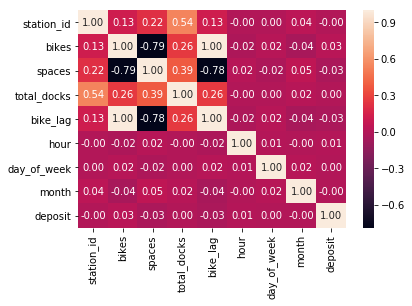

In [8]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [19]:
df.isnull().values.any()

False

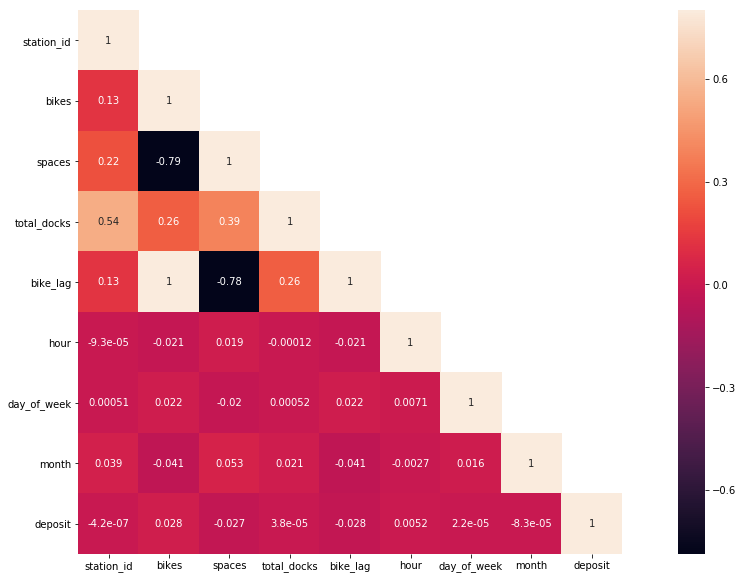

In [21]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [10]:
dfPivot = pd.pivot_table(df, values = "bikes", 
                             columns = "day_of_week", index = "hour")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3d7a6780>,
      dtype=object)

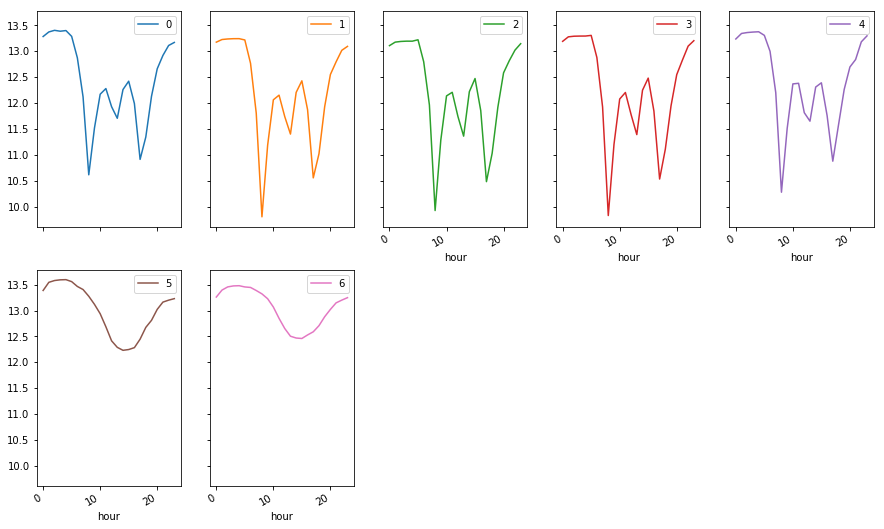

In [11]:
dfPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)

In [373]:
dfPivot = pd.pivot_table(df, values = "bikes", 
                             columns = "day_of_week", index = "hour")

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27900395 entries, 2017-06-01 00:00:01 to 2018-06-28 16:46:02
Data columns (total 15 columns):
station_id     int64
bikes          int64
spaces         int64
total_docks    int64
bike_lag       int64
bike_lag2      int64
bike_lag3      int64
bike_lag4      int64
deposit        int64
hour           int64
day_of_week    int64
month          int64
weekend        int64
bike_pull4     int64
Hour:Minute    object
dtypes: int64(14), object(1)
memory usage: 4.0+ GB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4d80f978>,
      dtype=object)

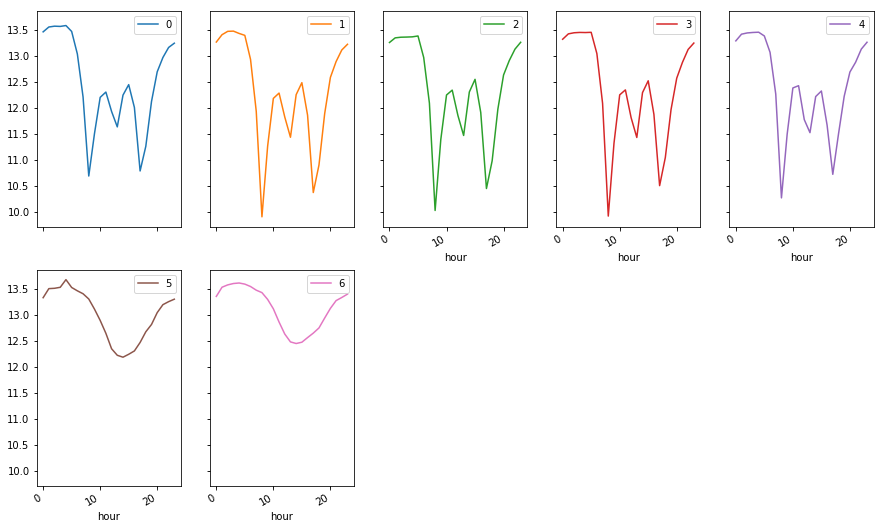

In [375]:
dfPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)

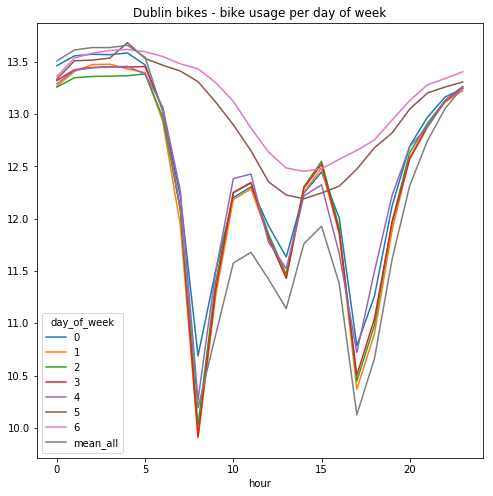

In [379]:
dfPivot.plot(subplots = False, figsize=(8, 8), layout=(3, 5), sharey=True, title="Dublin bikes - bike usage per day of week")

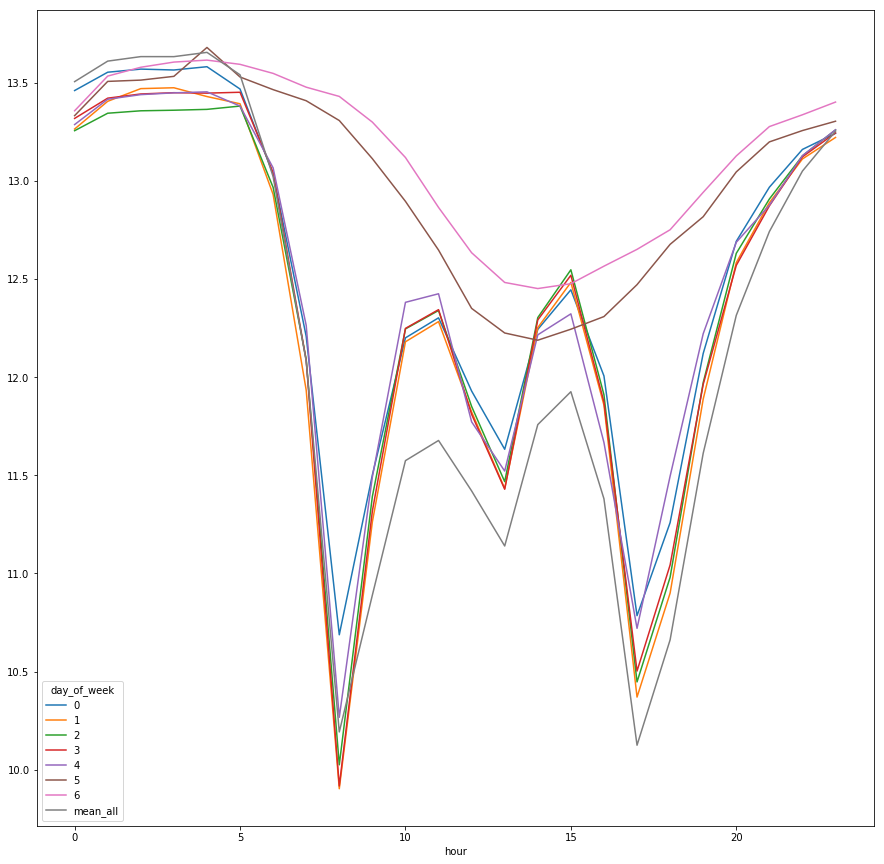

In [377]:
pivot_mean_hour = pd.read_csv('pivot_mean_hour.csv')
dfPivot['mean_all'] = pivot_mean_hour['all']
dfPivot.plot(subplots = False, figsize=(15, 15), layout=(3, 5), sharey=True)

hour                0          1          2          3          4          5   \
day_of_week                                                                     
0            13.461525  13.554898  13.570805  13.566232  13.582977  13.469197   
1            13.265364  13.406664  13.471311  13.475676  13.430917  13.394087   
2            13.256838  13.345887  13.358285  13.361194  13.365555  13.382355   
3            13.319440  13.422682  13.444017  13.450549  13.448287  13.452772   
4            13.288057  13.417151  13.440691  13.449803  13.454808  13.382324   
5            13.333544  13.508113  13.514691  13.533828  13.681091  13.530483   
6            13.358415  13.535209  13.580208  13.606570  13.616649  13.595073   

hour                6          7          8          9     ...             14  \
day_of_week                                                ...                  
0            13.035541  12.208524  10.687395  11.502297    ...      12.244031   
1            12.931891  11.934155   9.902612  11.263036    ...      12.253097   
2            12.967993  12.090690  10.024505  11.392395    ...      12.304105   
3            13.043379  12.086092   9.916662  11.318071    ...      12.292167   
4            13.067385  12.264561  10.266697  11.491821    ...      12.216331   
5            13.466106  13.409532  13.308672  13.114065    ...      12.188862   
6            13.548944  13.478626  13.431547  13.300525    ...      12.452195   

hour                15         16         17         18         19         20  \
day_of_week                                                                     
0            12.445808  12.006768  10.784841  11.259129  12.121355  12.692912   
1            12.483449  11.857999  10.369764  10.899804  11.888623  12.584442   
2            12.547864  11.910874  10.447028  10.980411  11.972956  12.631663   
3            12.519903  11.873650  10.502474  11.043392  11.964034  12.570275   
4            12.323258  11.667288  10.720230  11.495833  12.221910  12.688051   
5            12.244879  12.309375  12.472085  12.677547  12.818407  13.046746   
6            12.476972  12.566231  12.651973  12.751928  12.942640  13.128055   

hour                21         22         23  
day_of_week                                   
0            12.968660  13.161363  13.243353  
1            12.889684  13.112845  13.222405  
2            12.908573  13.128562  13.260858  
3            12.873793  13.123437  13.245797  
4            12.876735  13.129724  13.261563  
5            13.199711  13.257572  13.305090  
6            13.277757  13.337972  13.402778  

[7 rows x 24 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b007a58>,
      dtype=object)

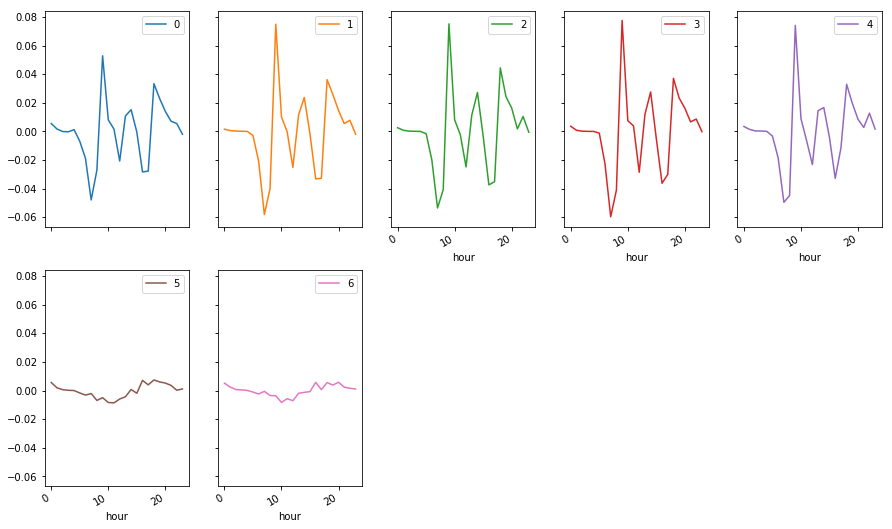

In [13]:
dfPivotDeposit.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)

In [200]:
dfPivotDeposit.plot(subplots = False, figsize=(15, 15), layout=(3, 5), sharey=True)

NameError: name 'dfPivotDeposit' is not defined

In [22]:
df.head(2)

station_id  bikes  spaces  total_docks  bike_lag  hour  \
timestamp                                                                     
2018-01-01 00:00:02           1     18      13           31         0     0   
2018-01-01 00:00:02          19     15      15           30         6     0   

                     day_of_week  month  deposit  
timestamp                                         
2018-01-01 00:00:02            0      1        0  
2018-01-01 00:00:02            0      1        9

In [14]:
dfPivotStationSum = pd.pivot_table(df, values = "bikes", 
                             columns = "station_id", index = "day_of_week")

[Text(0,0.5,'bikes'),
 Text(0.5,0,'Bikes deposited'),
 Text(0.5,1,'count by bikes deposited')]

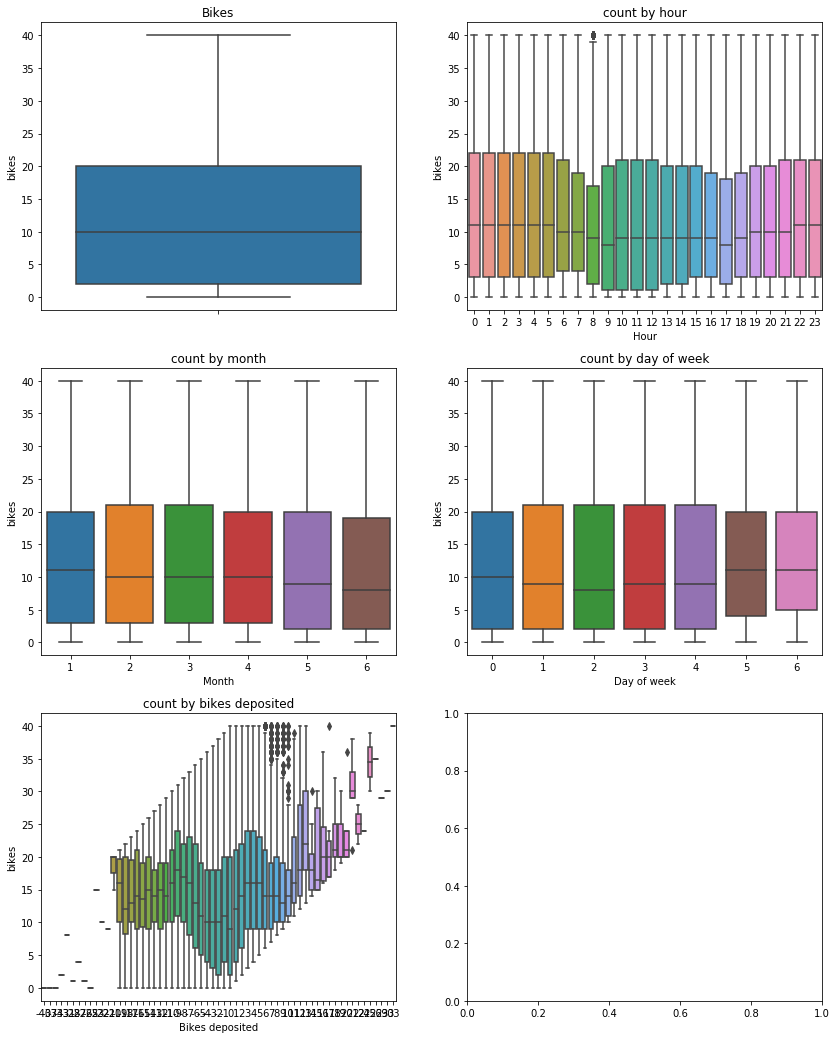

In [24]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(14, 18)
sns.boxplot(data=df, y="bikes", orient="v", ax=axes[0][0])
sns.boxplot(data=df, y="bikes", x="hour", orient="v", ax=axes[0][1])
sns.boxplot(data=df, y="bikes", x="month", orient="v", ax=axes[1][0])
sns.boxplot(data=df, y="bikes", x="day_of_week", orient="v", ax=axes[1][1])
sns.boxplot(data=df, y="bikes", x="deposit", orient="v", ax=axes[2][0])



axes[0][0].set(ylabel="bikes", title="Bikes")
axes[0][1].set(xlabel="Hour", ylabel="bikes", title="count by hour")
axes[1][0].set(xlabel="Month", ylabel="bikes", title="count by month")
axes[1][1].set(xlabel="Day of week", ylabel="bikes", title="count by day of week")
axes[2][0].set(xlabel="Bikes deposited", ylabel="bikes", title="count by bikes deposited")

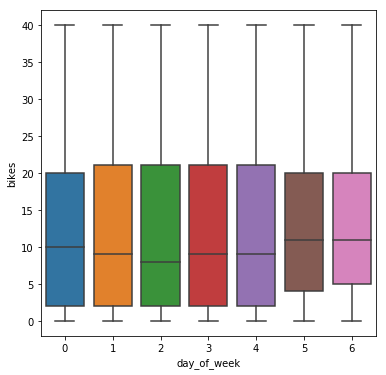

In [25]:

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
ax = sns.boxplot(data=df, y="bikes", x="day_of_week")

In [7]:
df.columns

Index(['station_id', 'bikes', 'spaces', 'total_docks', 'bike_lag', 'bike_lag2',
       'bike_lag3', 'bike_lag4', 'deposit', 'hour', 'day_of_week', 'month',
       'weekend', 'bike_pull4'],
      dtype='object')

In [12]:
dfPivot = pd.pivot_table(df[df['station_id'] == 34], values = "bikes", 
                             columns = ["day_of_week"], index = "hour")

In [13]:
dfPivot.head(2)

day_of_week          0          1          2          3          4          5  \
hour                                                                            
0            25.019093  24.480097  22.693270  23.298607  23.696364  21.167879   
1            25.660000  24.867621  22.972007  23.781325  24.336970  22.231937   

day_of_week         6  
hour                   
0            18.59828  
1            19.91829

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ac6a2b240>,
      dtype=object)

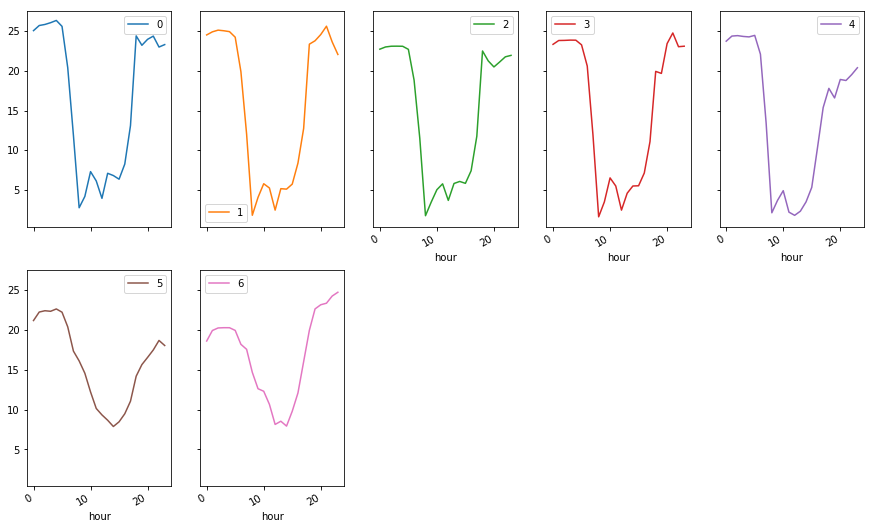

In [14]:
dfPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)

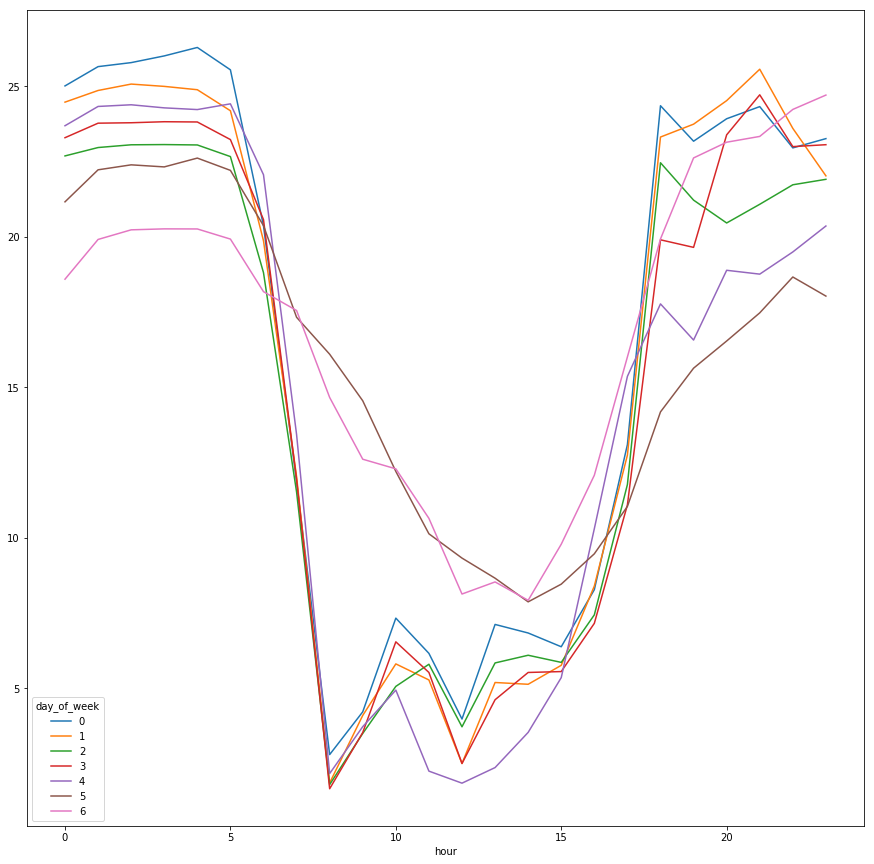

In [15]:
dfPivot.plot(subplots = False, figsize=(15, 15), layout=(3, 5), sharey=True)

/Users/neil/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


no station


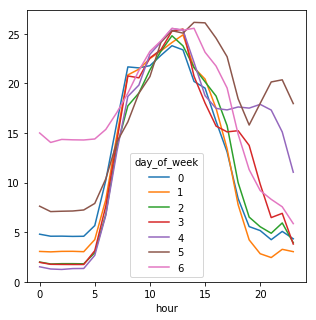

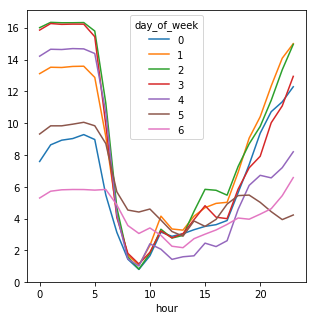

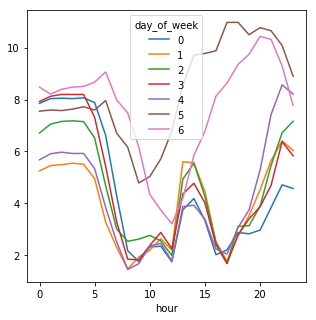

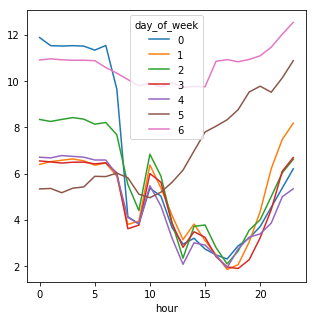

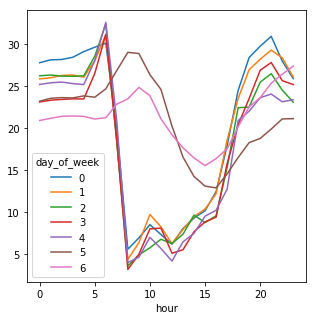

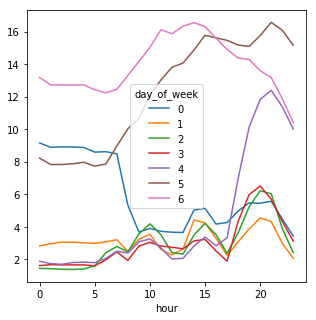

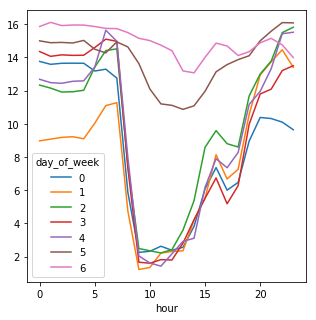

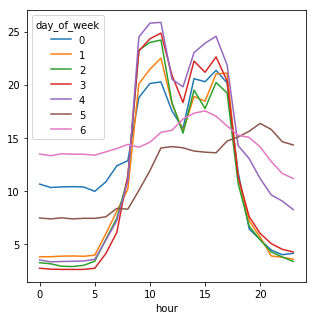

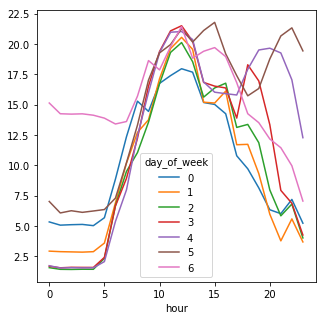

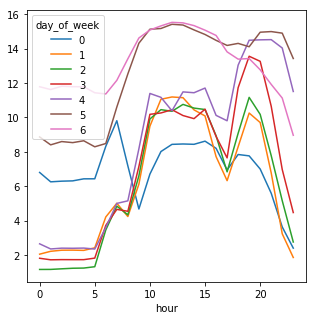

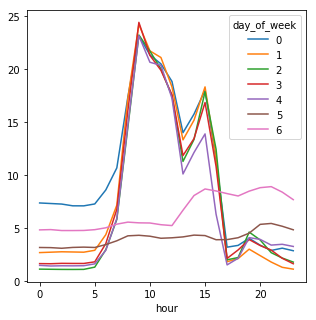

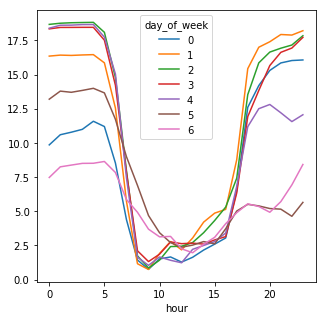

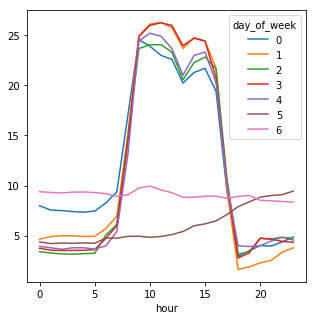

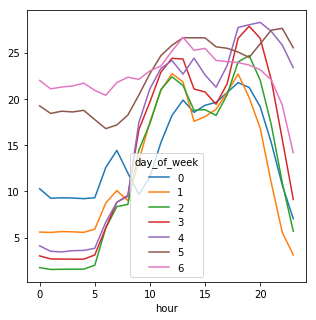

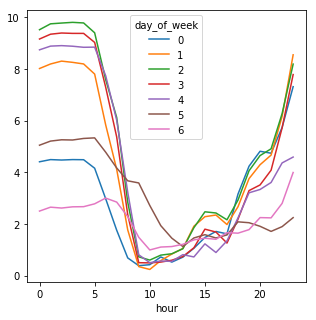

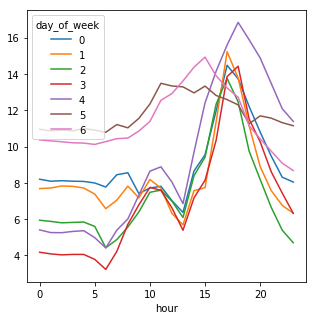

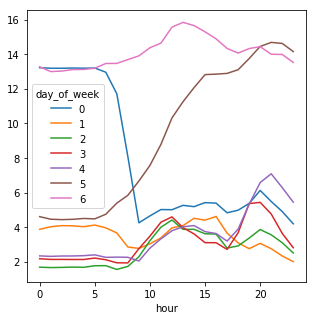

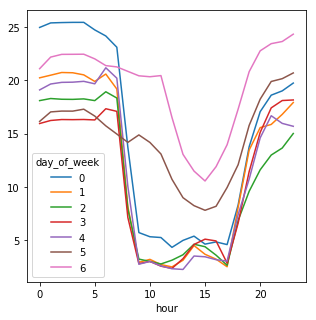

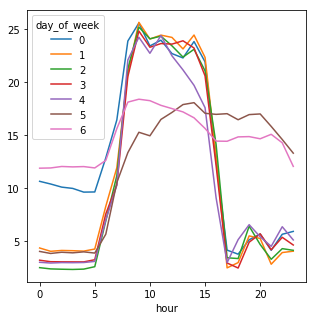

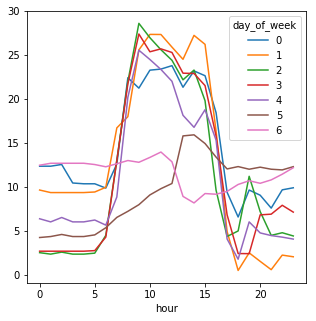

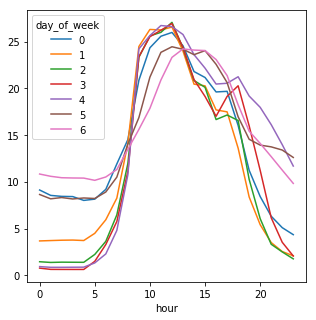

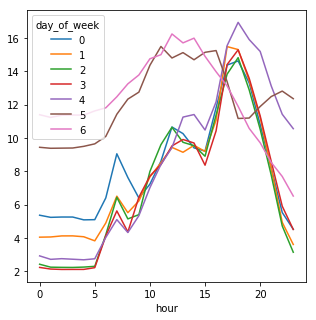

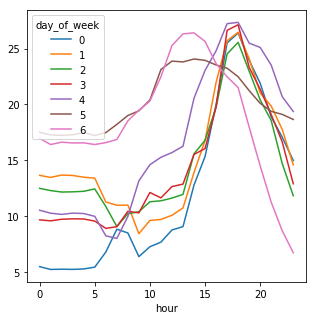

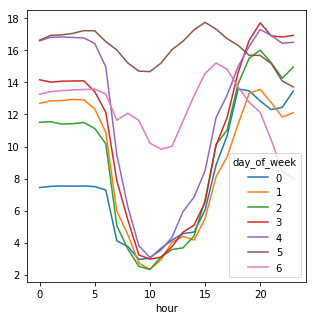

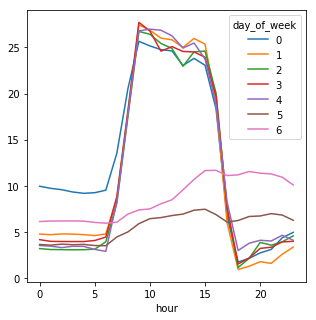

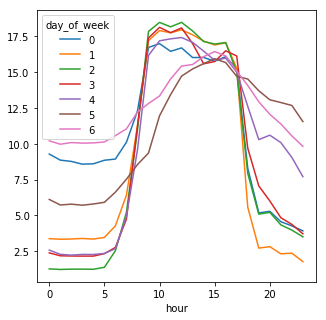

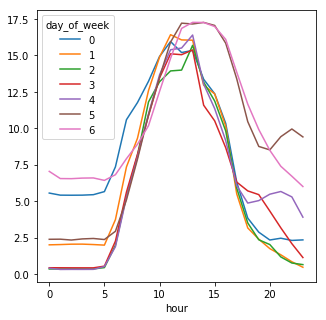

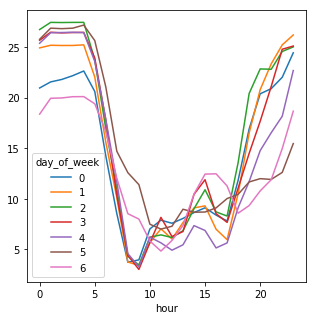

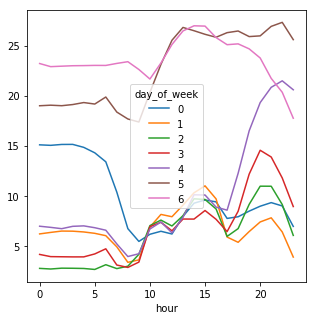

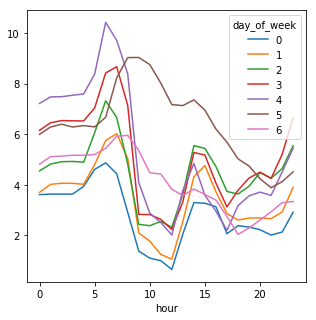

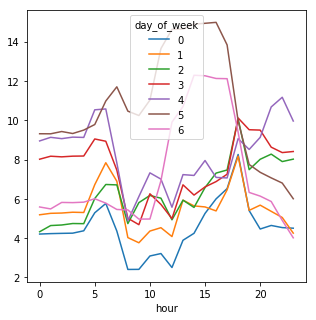

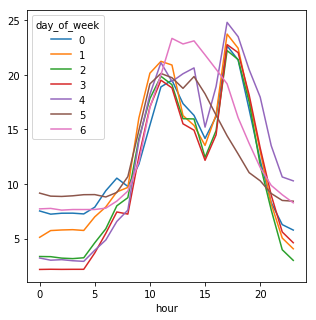

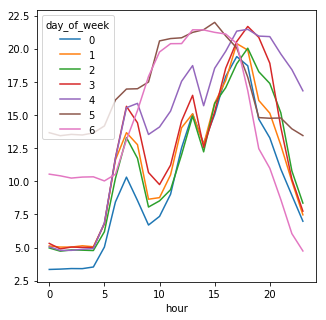

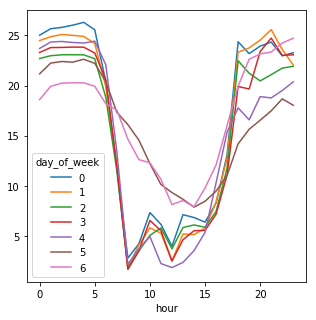

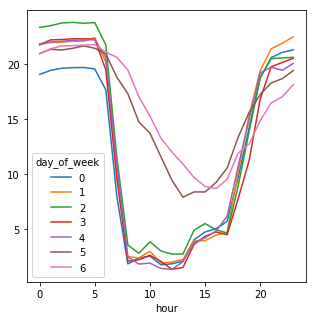

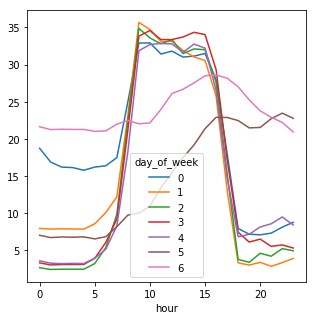

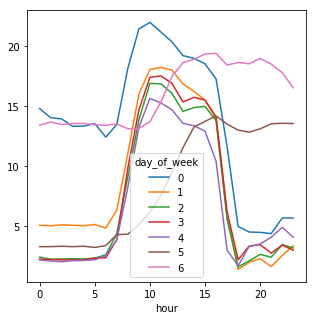

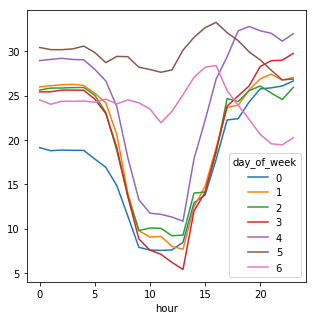

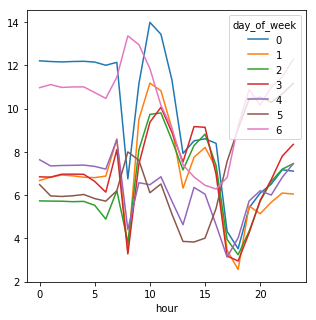

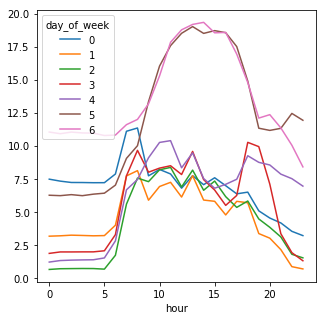

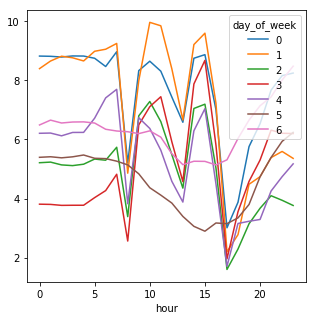

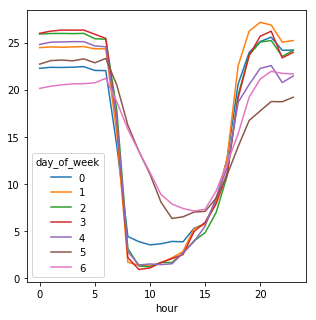

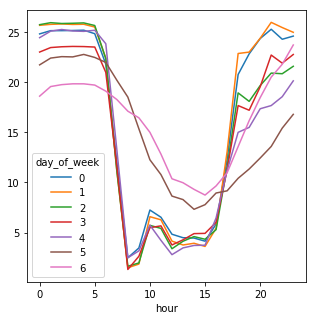

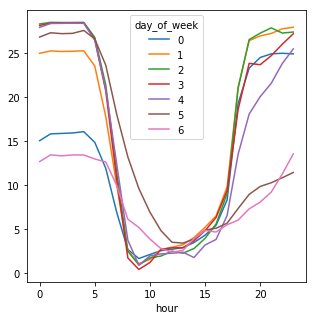

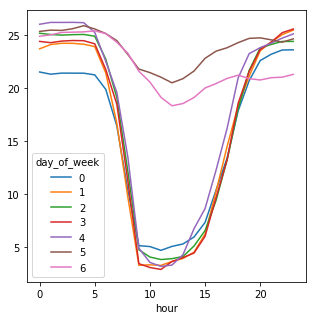

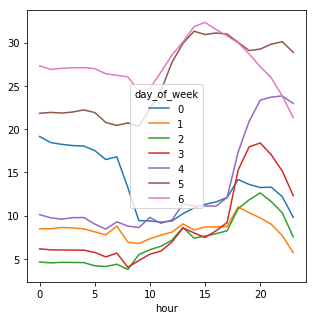

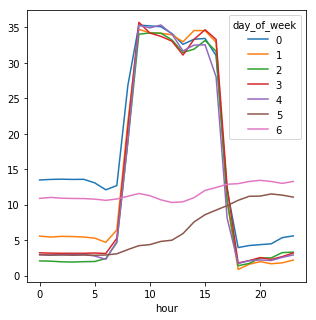

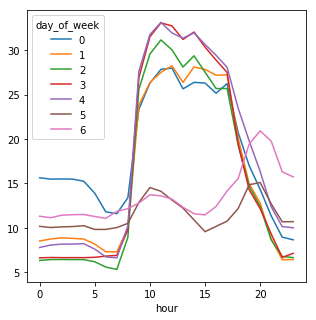

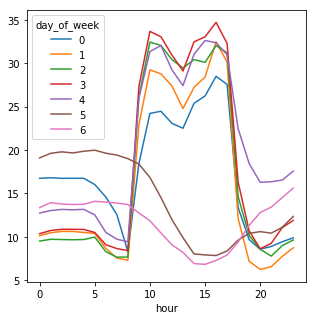

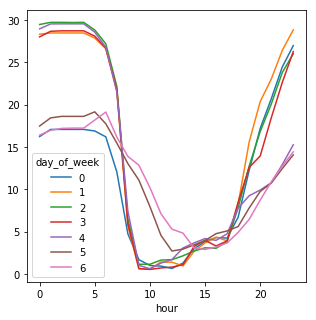

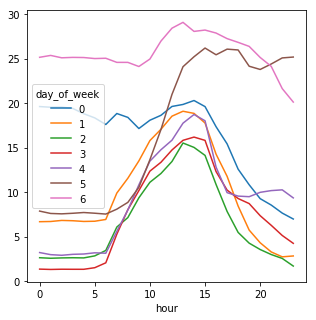

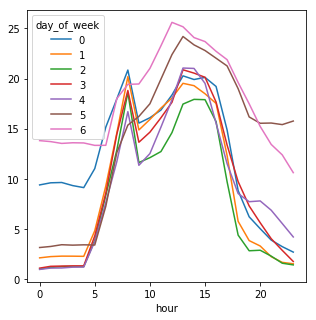

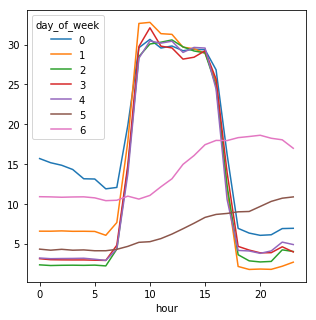

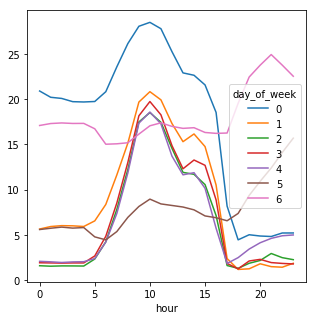

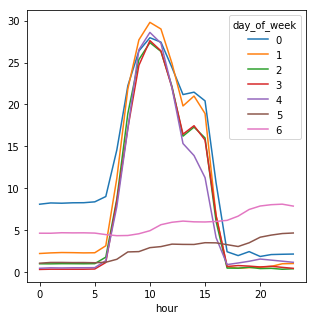

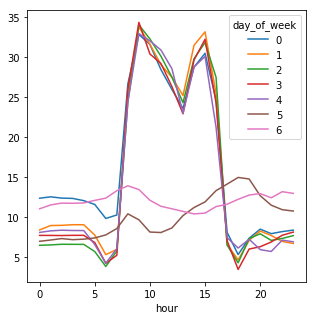

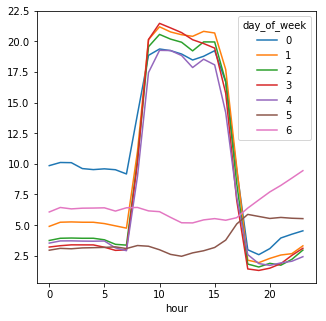

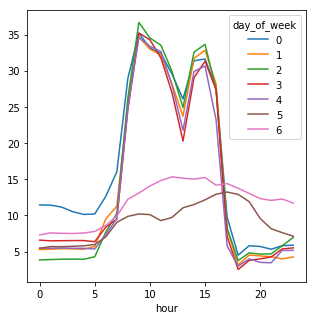

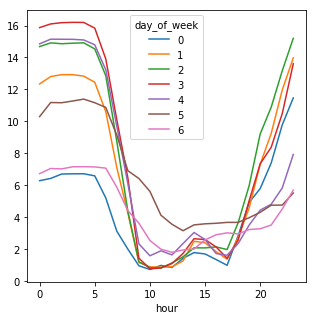

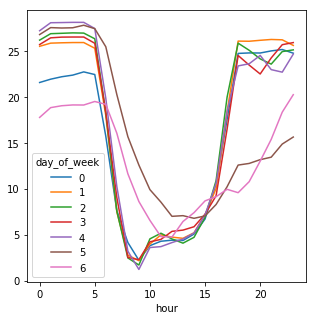

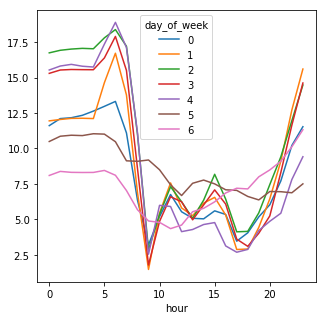

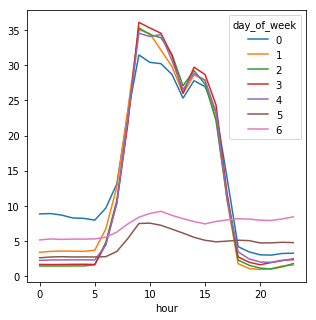

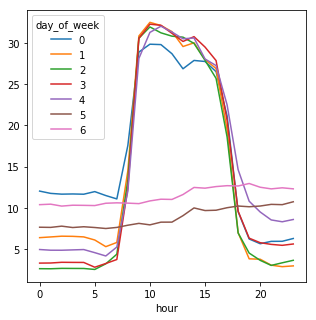

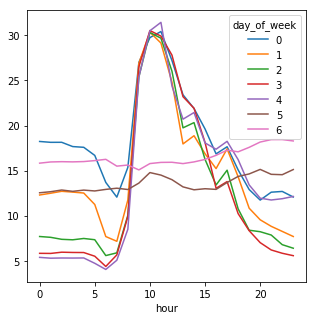

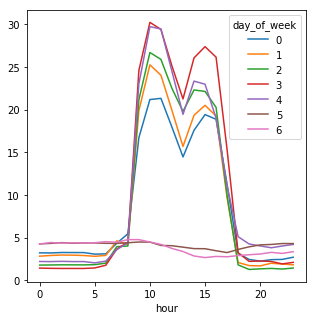

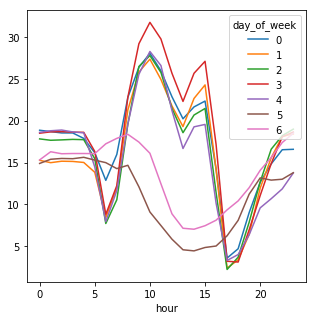

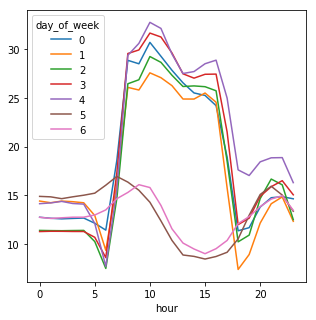

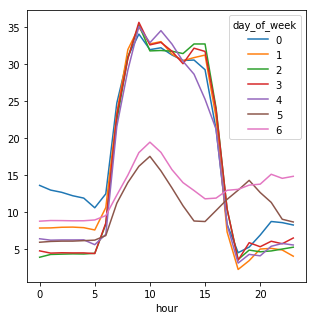

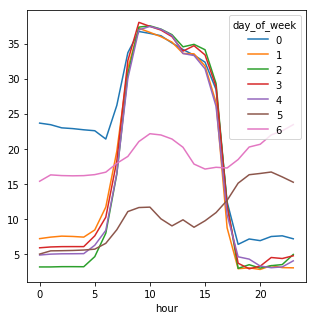

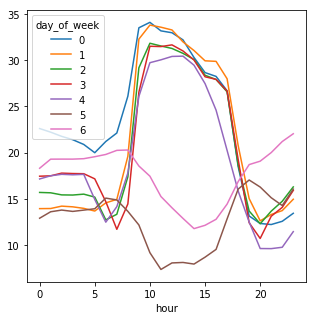

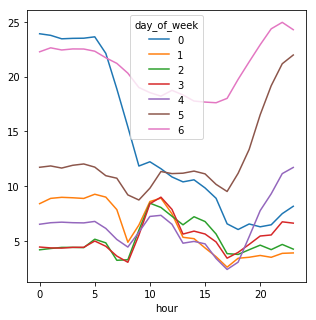

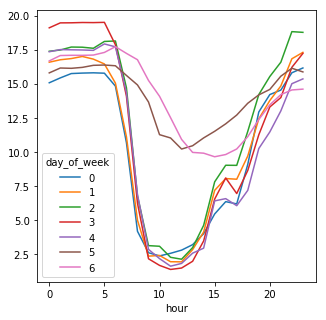

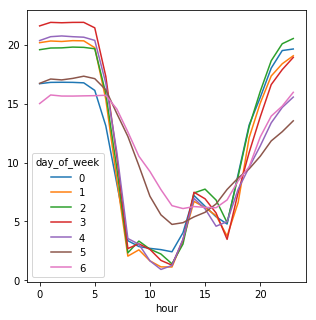

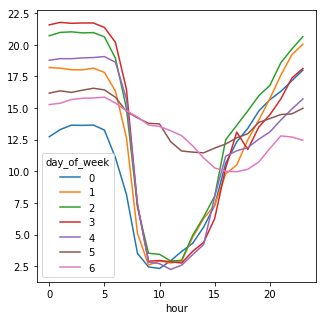

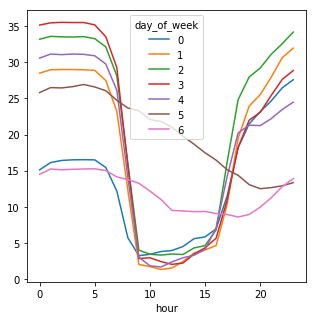

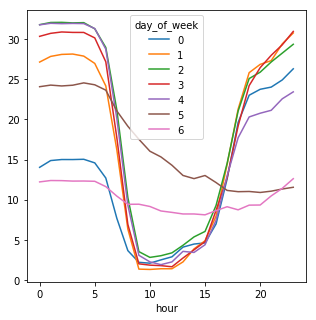

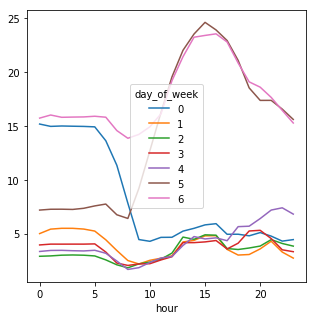

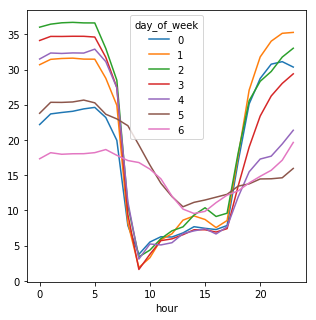

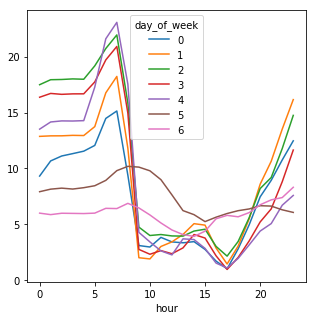

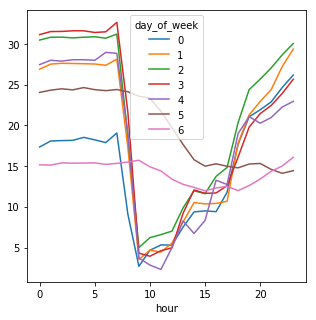

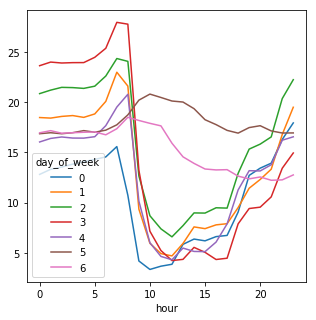

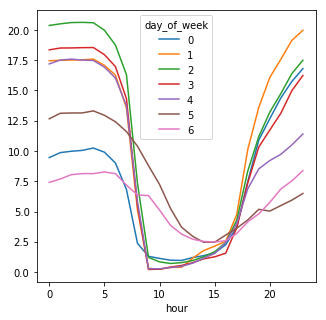

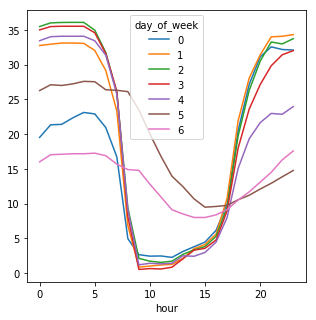

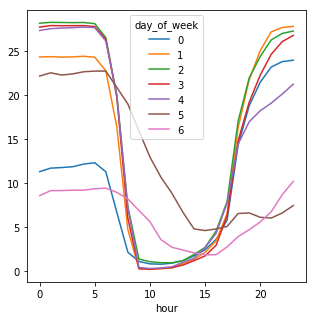

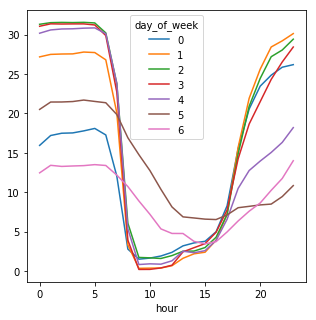

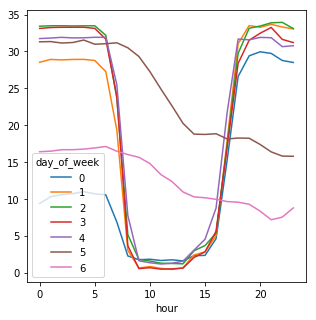

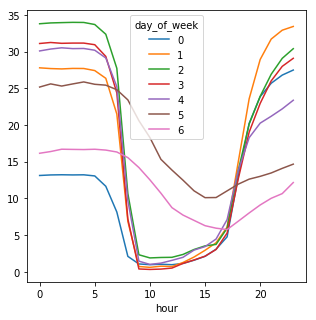

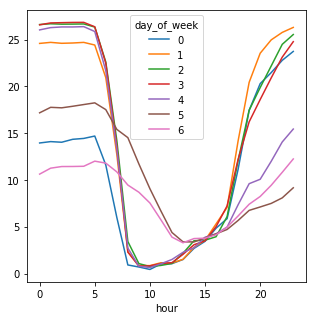

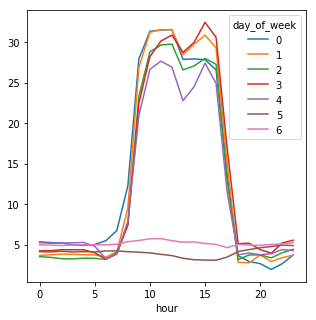

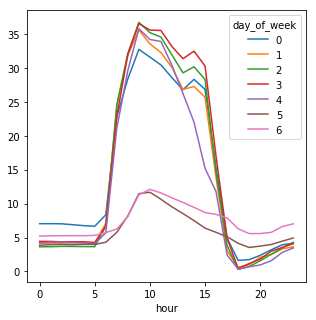

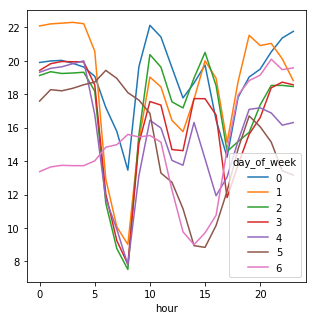

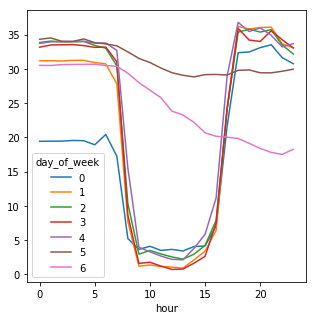

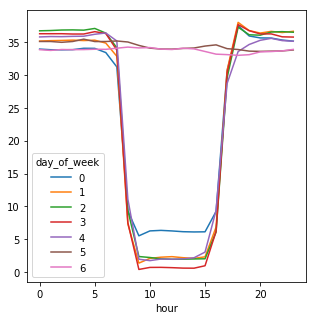

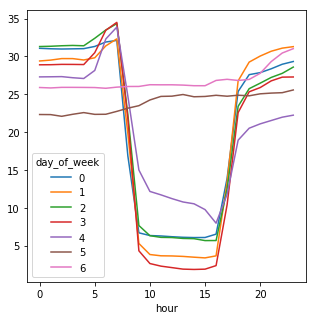

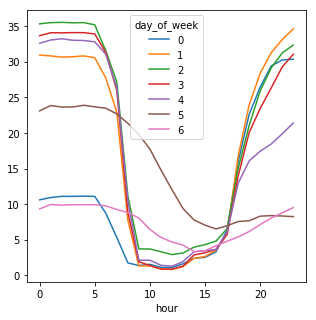

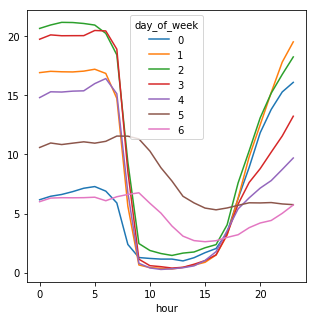

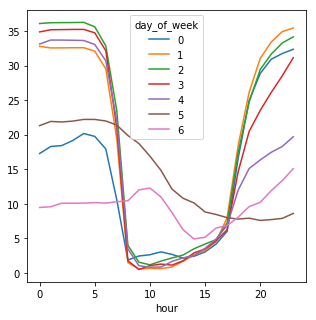

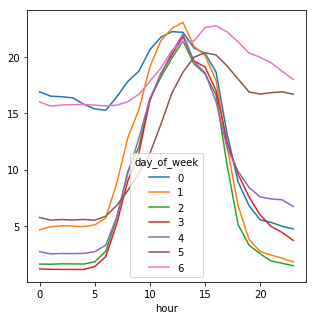

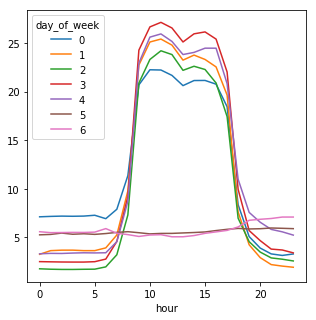

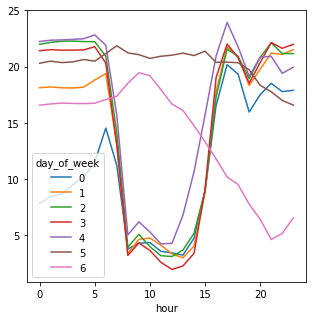

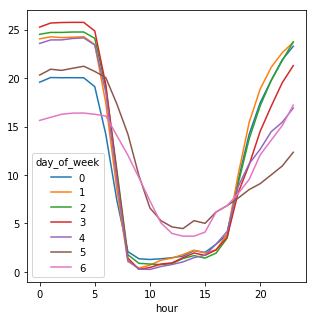

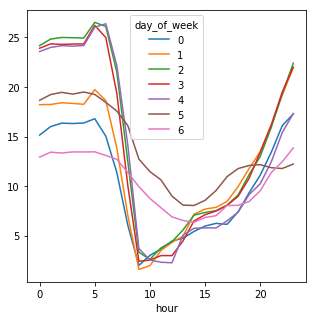

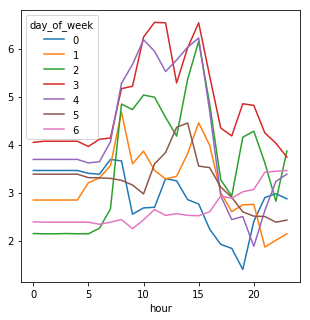

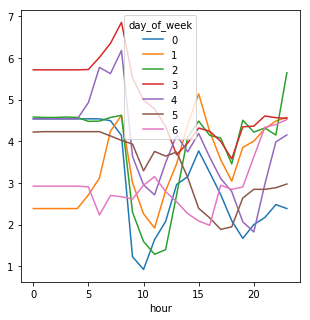

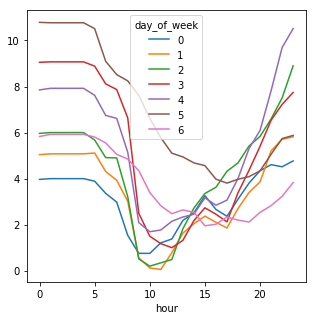

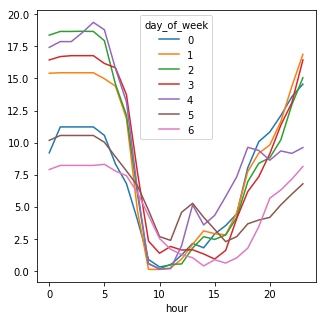

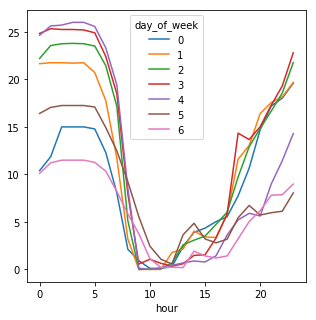

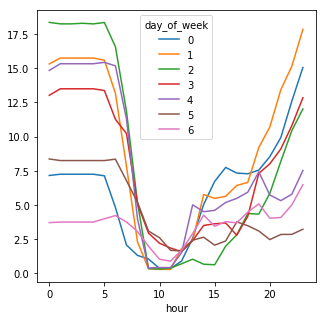

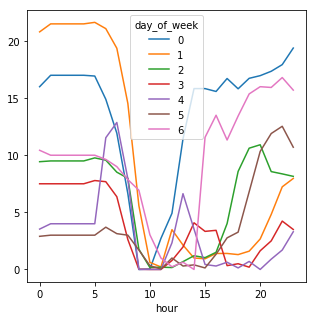

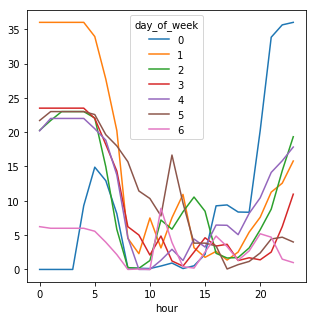

In [19]:
for i in range(1,112):
    try:
        dfPivot = pd.pivot_table(df[df['station_id'] == i], values = "bikes", 
                                 columns = ["day_of_week"], index = "hour")
        dfPivot.plot(subplots = False, figsize=(5, 5), layout=(3, 5), sharey=True)
    except:
        print('no station')

In [20]:
dfPivotMinute = pd.pivot_table(df[df['station_id'] == 34], values = "bikes", 
                             columns = ["day_of_week"], index = "minute")

KeyError: 'minute'

In [ ]:
dfPivotMinute.plot(subplots = False, figsize=(5, 5), layout=(3, 5), sharey=True)


In [35]:
df.head(2)

tfl_id  bikes  spaces  total_docks  \
timestamp                                                 
2017-06-01 00:00:01      42     29       1           30   
2017-06-01 00:00:01      30      4      16           20   

                                             time  hour  minute  
timestamp                                                        
2017-06-01 00:00:01  <map object at 0x1a12f8c080>     0       0  
2017-06-01 00:00:01  <map object at 0x1a12f8c080>     0       0

In [ ]:
df['month'] = pd.DatetimeIndex(df.index).month

In [41]:
df['time'] = pd.DatetimeIndex(df.index).time

In [42]:
IPython.display.Audio("Nick Cave and the Bad Seeds - We No Who U R.mp3", autoplay=True)

NameError: name 'IPython' is not defined

In [18]:
df['hour'] = pd.to_datetime(df.index).hour

In [19]:
df['minute'] = pd.to_datetime(df.index).minute

In [28]:
map(lambda s: s[:-3], df['time'])

In [ ]:
df['time'].apply(lambda t: t.strftime('%H:%M'))

In [40]:
df['other'] = df.index.map(lambda t: t.strftime('%H:%M'))

KeyboardInterrupt: 

In [ ]:
df.head(2)

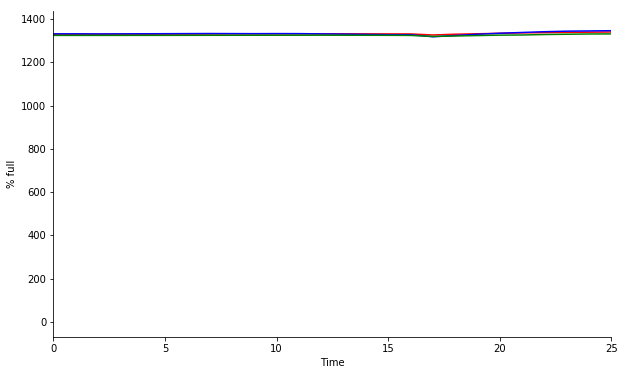

In [74]:
# Now we'll do the kmeans clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns

n_clusters = 3


fig, ax = plt.subplots(figsize=(10,6))
colours = ['red','blue','green','black']



# Fit kmeans model and plot the centroids
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dfPivotHourMinute.T)
for k, colour in zip(kmeans.cluster_centers_, colours):
    plt.plot(100*k,color=colour,label=colour)
  
  
ax.set_xlim([0,23])
xticks = ax.get_xticks()
plt.xticks(xticks, rotation='horizontal')
plt.xlabel('Time')
plt.ylabel("% full")
sns.despine()
plt.show()

clusters = kmeans.predict(dfPivotHourMinute.T)

In [73]:
dfPivotHourMinute = dfPivotHourMinute.fillna(0)

In [46]:
df['time'] = pd.DatetimeIndex(df.index).time

In [53]:
import IPython
from IPython import display
#IPython.display.Audio("Nick Cave and the Bad Seeds - We No Who U R.mp3", autoplay=True)

In [75]:
dfPivotHourMinute.head()

day_of_week          0          1          2          3          4          5  \
Hour:Minute                                                                     
00:00        13.430780  13.240563  13.224699  13.282910  13.236515  13.305676   
00:02        13.435934  13.239480  13.225584  13.291880  13.235432  13.306580   
00:04        13.433979  13.243273  13.224699  13.284531  13.240303  13.293384   
00:06        13.435578  13.241828  13.223815  13.285560  13.240664  13.299892   
00:08        13.442332  13.243092  13.228415  13.290241  13.241746  13.301880   

day_of_week          6  
Hour:Minute             
00:00        13.317351  
00:02        13.322055  
00:04        13.323684  
00:06        13.326579  
00:08        13.332007

In [172]:
df['hour'] = pd.DatetimeIndex(df.index).hour

In [ ]:
df['time'].apply(lambda t: t.strftime('%H:%M'))

In [56]:
df = df.drop('time',axis=1)

df['other'] = df.index.map(lambda t: t.strftime('%H:%M'))

In [174]:
df.head()

station_id  bikes  spaces  total_docks  bike_lag  \
timestamp                                                               
2017-06-01 00:00:01           1      0      31           31         0   
2017-06-01 00:00:01          82     22       0           22         4   
2017-06-01 00:00:01          81     25      15           40         0   
2017-06-01 00:00:01          80     25      15           40         0   
2017-06-01 00:00:01           9      0      24           24        28   

                     bike_lag2  bike_lag3  bike_lag4  deposit  hour  \
timestamp                                                             
2017-06-01 00:00:01          0          0          0        0     0   
2017-06-01 00:00:01          4          4          4       18     0   
2017-06-01 00:00:01          1          0          0       25     0   
2017-06-01 00:00:01          0          0          0       25     0   
2017-06-01 00:00:01         28         29         30      -28     0   

                     day_of_week  month  weekend  bike_pull4 Hour:Minute  
timestamp                                                                 
2017-06-01 00:00:01            3      6        0           0       00:00  
2017-06-01 00:00:01            3      6        0          22       00:00  
2017-06-01 00:00:01            3      6        0          25       00:00  
2017-06-01 00:00:01            3      6        0          26       00:00  
2017-06-01 00:00:01            3      6        0           0       00:00

In [58]:
df.rename(columns = {'other':'Hour:Minute'}, inplace = True)

In [59]:
df.head()

station_id  bikes  spaces  total_docks  bike_lag  \
timestamp                                                               
2017-06-01 00:00:01           1      0      31           31         0   
2017-06-01 00:00:01          82     22       0           22         4   
2017-06-01 00:00:01          81     25      15           40         0   
2017-06-01 00:00:01          80     25      15           40         0   
2017-06-01 00:00:01           9      0      24           24        28   

                     bike_lag2  bike_lag3  bike_lag4  deposit  hour  \
timestamp                                                             
2017-06-01 00:00:01          0          0          0        0     0   
2017-06-01 00:00:01          4          4          4       18     0   
2017-06-01 00:00:01          1          0          0       25     0   
2017-06-01 00:00:01          0          0          0       25     0   
2017-06-01 00:00:01         28         29         30      -28     0   

                     day_of_week  month  weekend  bike_pull4 Hour:Minute  
timestamp                                                                 
2017-06-01 00:00:01            3      6        0           0       00:00  
2017-06-01 00:00:01            3      6        0          22       00:00  
2017-06-01 00:00:01            3      6        0          25       00:00  
2017-06-01 00:00:01            3      6        0          26       00:00  
2017-06-01 00:00:01            3      6        0           0       00:00

In [175]:
#dfPivotHourMinute = pd.pivot_table(df[df['station_id'] == 34], values = "bikes", aggfunc={'bikes': np.mean},
#                             columns = ["day_of_week"], index = "Hour:Minute")

#dfPivotHourMinute = pd.pivot_table(df[df['weekend']==0], values = "bikes", 
#                             columns = ["station_id"], index = "Hour:Minute")

dfPivotHourMinute = pd.pivot_table(df, values = "bikes", 
                              columns = ["station_id"], index = "Hour:Minute")

dfPivotHourMinute = pd.pivot_table(df, values = "bikes", 
                              columns = ["station_id"], index = "hour")

In [176]:
pd.isnull(dfPivotHourMinute).sum() > 0


station_id
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
       ...  
82     False
83     False
84     False
85     False
86     False
87     False
88     False
89     False
90     False
91     False
92     False
93     False
94     False
95     False
96     False
97     False
98     False
99     False
100    False
101    False
102    False
103    False
104    False
105    False
106    False
107    False
108    False
110    False
111    False
112    False
Length: 111, dtype: bool

In [177]:
dfPivotHourMinute = dfPivotHourMinute.dropna(axis=0)

In [178]:
dfPivotHourMinute

station_id        1          2         3         4          5         6    \
hour                                                                        
0            5.129940  11.643541  7.060747  8.013892  24.657693  5.457463   
1            4.759218  12.186169  7.190756  7.950407  24.891812  5.266228   
2            4.833566  12.210227  7.262587  7.963811  24.977622  5.290822   
3            4.854369  12.249393  7.285974  8.000607  24.996273  5.322555   
4            4.854331  12.312581  7.293766  7.980491  25.078904  5.322986   
5            5.841652  11.899826  6.886435  7.921913  26.545913  5.215739   
6            9.334429   8.733114  5.824699  7.943959  29.111649  5.426619   
7           14.701414   4.433143  4.295872  7.359001  20.791450  5.835862   
8           19.279955   2.301803  3.295734  5.279695  10.424137  5.395873   
9           20.401369   1.768157  2.971052  4.952938  11.666060  5.885422   
10          22.162450   2.587766  3.057096  6.414746  12.751603  6.432074   
11          23.629751   3.259675  3.190826  5.916465  11.687457  6.344679   
12          24.915822   2.675673  2.856153  4.912358   9.640686  6.114229   
13          24.766866   2.718801  5.045293  4.169654   9.944661  6.250368   
14          22.566595   3.448291  5.653570  4.852012  10.615837  7.193596   
15          20.879582   3.977870  5.144623  4.752075  10.902144  7.456777   
16          18.836457   3.986052  4.236335  4.495685  11.876384  6.779793   
17          16.722367   4.217093  4.166161  4.224035  16.070022  6.391878   
18          13.208066   5.671283  5.004674  4.563701  21.217068  7.530119   
19          10.681359   6.833377  5.284677  5.124535  23.496413  8.595281   
20           9.797492   7.635192  5.979594  5.667358  25.211327  9.142585   
21           9.137591   8.581516  6.874870  6.447127  26.286172  9.123572   
22           9.199357   9.473040  7.466094  7.468785  25.344274  7.896154   
23           7.160629  10.587101  6.928590  8.077808  24.629636  6.670701   

station_id        7          8          9          10     ...            102  \
hour                                                      ...                  
0           13.271009   6.406471   5.014324   4.965910    ...      19.522751   
1           13.167388   6.238532   4.608188   4.738050    ...      20.048941   
2           13.153671   6.284091   4.666171   4.831806    ...      20.163804   
3           13.181952   6.276699   4.661755   4.844575    ...      20.127238   
4           13.192665   6.285268   4.643631   4.863585    ...      20.158046   
5           13.556261   6.318696   5.144609   4.806223    ...      21.168003   
6           14.209548   7.548560   7.851509   6.116206    ...      20.405879   
7           14.156161   9.085060  10.387930   7.410295    ...      16.908515   
8            9.056095  11.337957  13.238339   7.293429    ...      10.983658   
9            5.489773  19.130265  15.701248   8.785901    ...       5.088982   
10           5.182637  20.316843  18.061428  11.117447    ...       4.689368   
11           5.160850  21.051659  19.737560  11.617637    ...       4.944829   
12           5.223088  17.920239  20.557288  11.663707    ...       4.906399   
13           5.468693  16.559886  19.341994  11.816836    ...       5.632543   
14           6.405193  19.330247  17.175335  11.582514    ...       6.621718   
15           8.246629  18.982106  17.221041  11.588634    ...       7.051521   
16           9.664109  20.074710  16.790951  10.421657    ...       7.356726   
17           8.917737  19.072197  14.221798   9.362547    ...       8.041196   
18           9.280422  12.845681  14.420460  11.086270    ...       8.958189   
19          11.547489  10.255207  13.651197  12.098685    ...      10.398579   
20          12.860527   9.192218  12.029918  11.761656    ...      11.843173   
21          13.432935   8.002769  10.704396  10.299930    ...      13.890248   
22          14.233568   7.382912  10.694973   8.420845    ...      16.220858 

In [179]:
#dfPivotHourMinute.plot(subplots = True, layout=(50, 5), sharex=True)

In [180]:
dfPivotHourMinute.T

hour               0          1          2          3          4          5   \
station_id                                                                     
1            5.129940   4.759218   4.833566   4.854369   4.854331   5.841652   
2           11.643541  12.186169  12.210227  12.249393  12.312581  11.899826   
3            7.060747   7.190756   7.262587   7.285974   7.293766   6.886435   
4            8.013892   7.950407   7.963811   8.000607   7.980491   7.921913   
5           24.657693  24.891812  24.977622  24.996273  25.078904  26.545913   
6            5.457463   5.266228   5.290822   5.322555   5.322986   5.215739   
7           13.271009  13.167388  13.153671  13.181952  13.192665  13.556261   
8            6.406471   6.238532   6.284091   6.276699   6.285268   6.318696   
9            5.014324   4.608188   4.666171   4.661755   4.643631   5.144609   
10           4.965910   4.738050   4.831806   4.844575   4.863585   4.806223   
11           3.179135   3.152934   3.146154   3.129334   3.129801   3.256870   
12          14.633877  15.037043  15.051486  15.123526  15.244689  14.707391   
13           5.329748   5.190882   5.172920   5.180376   5.177199   5.175612   
14           9.399275   8.790981   8.870192   8.933599   8.964450   8.948522   
15           6.780395   6.963995   6.982780   6.973128   6.971560   6.784696   
16           7.522591   7.434401   7.425571   7.438655   7.443040   7.240559   
17           5.868346   5.769690   5.818007   5.833044   5.825371   5.861478   
18          19.387456  19.892851  20.019668  20.008148  20.026359  19.610087   
19           5.604405   5.416130   5.453475   5.410770   5.373921   5.436189   
20           7.163492   7.095238   7.330523   6.822222   6.809524   6.880952   
21           5.046066   4.796088   4.795804   4.786408   4.725657   5.127826   
22           5.383142   5.241734   5.278322   5.296550   5.266713   5.327304   
23          12.273616  12.021124  12.046875  12.087110  12.097937  12.046803   
24          13.171167  13.295222  13.289423  13.334258  13.361138  13.087826   
25           5.034722   4.923118   4.919335   4.885419   4.856646   4.783259   
26           4.975199   4.714876   4.739632   4.715745   4.716551   4.841343   
27           2.584504   2.463226   2.474906   2.493736   2.496400   2.537148   
28          23.995514  24.884542  24.879108  24.972868  25.092951  22.728957   
29          10.947918  10.806874  10.848146  10.938057  10.889452  10.782647   
30           5.138410   5.392553   5.442882   5.443621   5.485575   6.045804   
...               ...        ...        ...        ...        ...        ...   
82          14.707855  15.008221  15.081381  15.092060  15.158328  14.760174   
83          28.395102  29.243337  29.258042  29.420336  29.594815  29.043565   
84          21.382685  21.719020  21.642920  21.684813  21.798405  21.814522   
85          24.112357  24.804258  24.822290  24.828883  24.964710  24.975130   
86          26.267138  26.582591  26.575787  26.614511  26.728605  26.631913   
87          25.326033  25.554642  25.527797  25.560940  25.614151  25.431217   
88          20.814952  21.159817  21.134878  21.195215  21.272175  21.188783   
89           4.446071   4.416371   4.422872   4.387627   4.391359   4.271700   
90           4.649046   4.679514   4.689851   4.661040   4.638889   4.573535   
91          18.707227  19.017911  19.033654  19.057906  19.080291  18.009304   
92          30.863487  31.032621  30.950262  30.995839  31.035984  30.700261   
93          35.289669  35.291425  35.299213  35.324376  35.397121  35.492522   
94          28.046482  28.058228  28.090035  28.089893  28.087835  28.642870   
95          25.101069  25.569822  25.503059  25.472521  25.549120  25.407304   
96          13.561314  13.932255  13.934615  13.976248  14.057661  14.227130   
97          26.471197  26.921699  26.962413  27.060073  27.269834  26.907391   
98           6.975852   6.783180   6.854196   6.831831   6.741524   6.758000   


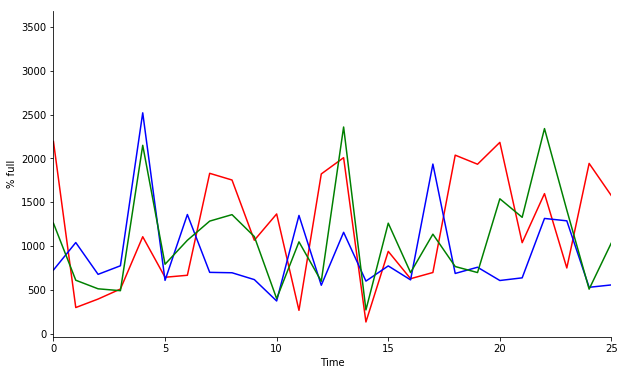

In [187]:
# Now we'll do the kmeans clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns

n_clusters =3


fig, ax = plt.subplots(figsize=(10,6))
colours = ['red','blue','green','black']



# Fit kmeans model and plot the centroids
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dfPivotHourMinute)
for k, colour in zip(kmeans.cluster_centers_, colours):
    plt.plot(100*k,color=colour,label=colour)
  
  
ax.set_xlim([0,23])
xticks = ax.get_xticks()
plt.xticks(xticks, rotation='horizontal')
plt.xlabel('Time')
plt.ylabel("% full")
sns.despine()
plt.show()



In [157]:
pd.isnull(dfPivotHourMinute).sum() > 0


day_of_week
0    True
1    True
2    True
3    True
4    True
5    True
6    True
dtype: bool

In [193]:
dfPivotHourMinute

station_id        1          2         3         4          5         6    \
hour                                                                        
0            5.129940  11.643541  7.060747  8.013892  24.657693  5.457463   
1            4.759218  12.186169  7.190756  7.950407  24.891812  5.266228   
2            4.833566  12.210227  7.262587  7.963811  24.977622  5.290822   
3            4.854369  12.249393  7.285974  8.000607  24.996273  5.322555   
4            4.854331  12.312581  7.293766  7.980491  25.078904  5.322986   
5            5.841652  11.899826  6.886435  7.921913  26.545913  5.215739   
6            9.334429   8.733114  5.824699  7.943959  29.111649  5.426619   
7           14.701414   4.433143  4.295872  7.359001  20.791450  5.835862   
8           19.279955   2.301803  3.295734  5.279695  10.424137  5.395873   
9           20.401369   1.768157  2.971052  4.952938  11.666060  5.885422   
10          22.162450   2.587766  3.057096  6.414746  12.751603  6.432074   
11          23.629751   3.259675  3.190826  5.916465  11.687457  6.344679   
12          24.915822   2.675673  2.856153  4.912358   9.640686  6.114229   
13          24.766866   2.718801  5.045293  4.169654   9.944661  6.250368   
14          22.566595   3.448291  5.653570  4.852012  10.615837  7.193596   
15          20.879582   3.977870  5.144623  4.752075  10.902144  7.456777   
16          18.836457   3.986052  4.236335  4.495685  11.876384  6.779793   
17          16.722367   4.217093  4.166161  4.224035  16.070022  6.391878   
18          13.208066   5.671283  5.004674  4.563701  21.217068  7.530119   
19          10.681359   6.833377  5.284677  5.124535  23.496413  8.595281   
20           9.797492   7.635192  5.979594  5.667358  25.211327  9.142585   
21           9.137591   8.581516  6.874870  6.447127  26.286172  9.123572   
22           9.199357   9.473040  7.466094  7.468785  25.344274  7.896154   
23           7.160629  10.587101  6.928590  8.077808  24.629636  6.670701   

station_id        7          8          9          10     ...            102  \
hour                                                      ...                  
0           13.271009   6.406471   5.014324   4.965910    ...      19.522751   
1           13.167388   6.238532   4.608188   4.738050    ...      20.048941   
2           13.153671   6.284091   4.666171   4.831806    ...      20.163804   
3           13.181952   6.276699   4.661755   4.844575    ...      20.127238   
4           13.192665   6.285268   4.643631   4.863585    ...      20.158046   
5           13.556261   6.318696   5.144609   4.806223    ...      21.168003   
6           14.209548   7.548560   7.851509   6.116206    ...      20.405879   
7           14.156161   9.085060  10.387930   7.410295    ...      16.908515   
8            9.056095  11.337957  13.238339   7.293429    ...      10.983658   
9            5.489773  19.130265  15.701248   8.785901    ...       5.088982   
10           5.182637  20.316843  18.061428  11.117447    ...       4.689368   
11           5.160850  21.051659  19.737560  11.617637    ...       4.944829   
12           5.223088  17.920239  20.557288  11.663707    ...       4.906399   
13           5.468693  16.559886  19.341994  11.816836    ...       5.632543   
14           6.405193  19.330247  17.175335  11.582514    ...       6.621718   
15           8.246629  18.982106  17.221041  11.588634    ...       7.051521   
16           9.664109  20.074710  16.790951  10.421657    ...       7.356726   
17           8.917737  19.072197  14.221798   9.362547    ...       8.041196   
18           9.280422  12.845681  14.420460  11.086270    ...       8.958189   
19          11.547489  10.255207  13.651197  12.098685    ...      10.398579   
20          12.860527   9.192218  12.029918  11.761656    ...      11.843173   
21          13.432935   8.002769  10.704396  10.299930    ...      13.890248   
22          14.233568   7.382912  10.694973   8.420845    ...      16.220858 

In [158]:
dfPivotHourMinute = dfPivotHourMinute.dropna(axis=0)

In [121]:
clusters = kmeans.predict(dfPivotHourMinute.T)

In [122]:
print(clusters)

[2 1 1 1 0]


In [123]:
df.to_csv('thistookages.csv')

In [226]:
weekday_avg = df.copy()

In [227]:
weekday_avg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27900395 entries, 2017-06-01 00:00:01 to 2018-06-28 16:46:02
Data columns (total 15 columns):
station_id     int64
bikes          int64
spaces         int64
total_docks    int64
bike_lag       int64
bike_lag2      int64
bike_lag3      int64
bike_lag4      int64
deposit        int64
hour           int64
day_of_week    int64
month          int64
weekend        int64
bike_pull4     int64
Hour:Minute    object
dtypes: int64(14), object(1)
memory usage: 3.3+ GB


In [228]:
weekday_avg['bikes'] = weekday_avg['bikes'].resample('15T').mean().bfill() 

In [229]:
weekday_avg.head(2)

station_id  bikes  spaces  total_docks  bike_lag  \
timestamp                                                               
2017-06-01 00:00:01           1    NaN      31           31         0   
2017-06-01 00:00:01          82    NaN       0           22         4   

                     bike_lag2  bike_lag3  bike_lag4  deposit  hour  \
timestamp                                                             
2017-06-01 00:00:01          0          0          0        0     0   
2017-06-01 00:00:01          4          4          4       18     0   

                     day_of_week  month  weekend  bike_pull4 Hour:Minute  
timestamp                                                                 
2017-06-01 00:00:01            3      6        0           0       00:00  
2017-06-01 00:00:01            3      6        0          22       00:00

In [219]:
weekday_avg = weekday_avg.groupby('Hour:Minute').agg('mean')

KeyError: 'Hour:Minute'

In [129]:
weekday_avg = weekday_avg.astype(int)

In [221]:
weekday_avg.head(23)

station_id      bikes     spaces  total_docks   bike_lag  \
timestamp                                                                       
2017-06-01 00:00:00   51.514851  13.832783  17.464246     31.29703  13.471397   
2017-06-01 00:15:00   51.514851  13.797030  17.496700     31.29703  13.798680   
2017-06-01 00:30:00   51.514851  13.865787  17.421342     31.29703  13.844884   
2017-06-01 00:45:00   51.514851  13.989549  17.307481     31.29703  13.972497   
2017-06-01 01:00:00   51.514851  14.026403  17.270627     31.29703  14.024752   
2017-06-01 01:15:00   51.514851  14.039604  17.257426     31.29703  14.037954   
2017-06-01 01:30:00   51.514851  14.039604  17.257426     31.29703  14.039604   
2017-06-01 01:45:00   51.514851  14.042904  17.254125     31.29703  14.041254   
2017-06-01 02:00:00   51.514851  14.049505  17.247525     31.29703  14.049505   
2017-06-01 02:15:00   51.514851  14.053905  17.243124     31.29703  14.052805   
2017-06-01 02:30:00   51.514851  14.059406  17.237624     31.29703  14.059406   
2017-06-01 02:45:00   51.514851  14.059406  17.237624     31.29703  14.059406   
2017-06-01 03:00:00   51.514851  14.059406  17.237624     31.29703  14.059406   
2017-06-01 03:15:00   51.514851  14.059406  17.237624     31.29703  14.059406   
2017-06-01 03:30:00   51.514851  14.059406  17.237624     31.29703  14.059406   
2017-06-01 03:45:00   51.514851  14.059406  17.237624     31.29703  14.059406   
2017-06-01 04:00:00   51.514851  14.059406  17.237624     31.29703  14.059406   
2017-06-01 04:15:00   51.514851  14.059406  17.237624     31.29703  14.059406   
2017-06-01 04:30:00   51.514851  14.059406  17.237624     31.29703  14.059406   
2017-06-01 04:45:00   51.514851  14.059406  17.237624     31.29703  14.059406   
2017-06-01 05:00:00   51.514851  14.018152  17.277778     31.29703  14.027503   
2017-06-01 05:15:00   51.514851  13.949395  17.337734     31.29703  13.965347   
2017-06-01 05:30:00   51.514851  13.987349  17.305281     31.29703  13.976898   

                     bike_lag2  bike_lag3  bike_lag4   deposit  hour  \
timestamp                                                              
2017-06-01 00:00:00  13.121012  12.779978  12.252475  0.361386   0.0   
2017-06-01 00:15:00  13.800880  13.804730  13.812431 -0.001650   0.0   
2017-06-01 00:30:00  13.826733  13.810231  13.801430  0.020902   0.0   
2017-06-01 00:45:00  13.956546  13.945545  13.933993  0.017052   0.0   
2017-06-01 01:00:00  14.022002  14.017602  14.012101  0.001650   1.0   
2017-06-01 01:15:00  14.036304  14.035204  14.034103  0.001650   1.0   
2017-06-01 01:30:00  14.039604  14.039604  14.039604  0.000000   1.0   
2017-06-01 01:45:00  14.039604  14.039604  14.039604  0.001650   1.0   
2017-06-01 02:00:00  14.049505  14.048405  14.047305  0.000000   2.0   
2017-06-01 02:15:00  14.051155  14.049505  14.049505  0.001100   2.0   
2017-06-01 02:30:00  14.059406  14.059406  14.058306  0.000000   2.0   
2017-06-01 02:45:00  14.059406  14.059406  14.059406  0.000000   2.0   
2017-06-01 03:00:00  14.059406  14.059406  14.059406  0.000000   3.0   
2017-06-01 03:15:00  14.059406  14.059406  14.059406  0.000000   3.0   
2017-06-01 03:30:00  14.059406  14.059406  14.059406  0.000000   3.0   
2017-06-01 03:45:00  14.059406  14.059406  14.059406  0.000000   3.0   
2017-06-01 04:00:00  14.059406  14.059406  14.059406  0.000000   4.0   
2017-06-01 04:15:00  14.059406  14.059406  14.059406  0.000000   4.0   
2017-06-01 04:30:00  14.059406  14.059406  14.059406  0.000000   4.0   
2017-06-01 04:45:00  14.059406  14.059406  14.059406  0.000000   4.0   
2017-06-01 05:00:00  14.035204  14.042354  14.049505 -0.009351   5.0   
2017-06-01 05:15:00  13.974147  13.979648  13.982398 -0.015952   5.0   
2017-06-01 05:30:00  13.971397  13.958746  13.947195  0.010451   5.0   

                     day_of_week  month  weekend  bike_pull4  
timestamp                                                     
2017-06-01 00:00:00          3.0    6.0      0.0   13.811331  
2017-

In [140]:
#weekday_avg = weekday_avg['bikes']/weekday_avg['bikes'].max()

In [ ]:
#weekday_avg['bikes'] = weekday_avg['bikes'].resample('15T').mean().bfill() 

In [259]:
#dfPivot = pd.pivot_table(df, values = "bikes", 
#                                 columns = ["day_of_week"], index = "hour")

dfPivot_daysofweek = pd.pivot_table(df, values = "bikes", 
                                 columns = ["hour"], index = "day_of_week")

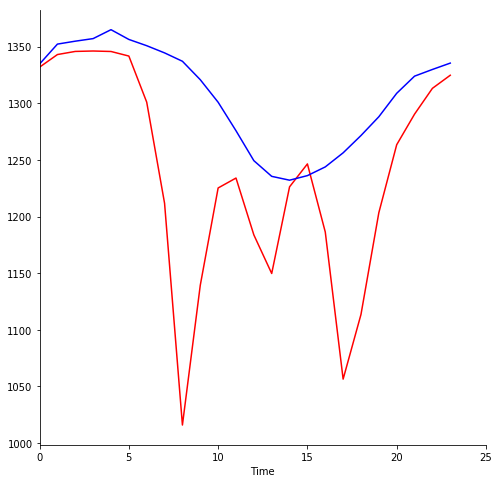

In [260]:
# Now we'll do the kmeans clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns

n_clusters =2


fig, ax = plt.subplots(figsize=(8,8))
colours = ['red','blue','green','black','orange','magenta','cyan']



# Fit kmeans model and plot the centroids
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dfPivot_daysofweek)


for k, colour in zip(kmeans.cluster_centers_, colours):
    plt.plot(100*k,color=colour,label=colour)
  
  
ax.set_xlim([0,23])
xticks = ax.get_xticks()
plt.xticks(xticks, rotation='horizontal')
plt.xlabel('Time')
sns.despine()
plt.show()

In [134]:
pd.isnull(df_norm).sum() > 0



station_id     False
bikes          False
spaces         False
total_docks    False
bike_lag       False
bike_lag2      False
bike_lag3      False
bike_lag4      False
deposit         True
hour           False
day_of_week    False
month          False
weekend         True
bike_pull4     False
dtype: bool

In [135]:
df_norm = df_norm.dropna(axis=0)

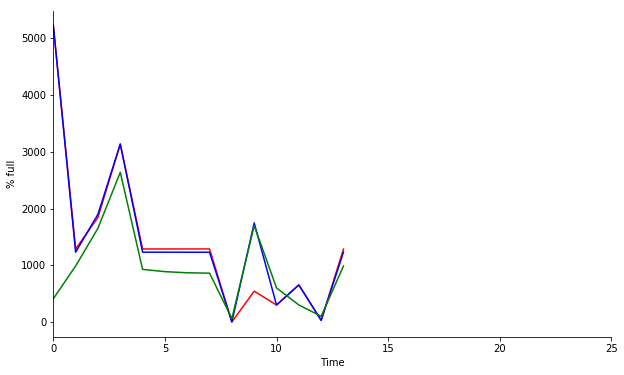

In [216]:
# Now we'll do the kmeans clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns

n_clusters = 3


fig, ax = plt.subplots(figsize=(10,6))
colours = ['red','blue','green','black']



# Fit kmeans model and plot the centroids
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(weekday_avg)
for k, colour in zip(kmeans.cluster_centers_, colours):
    plt.plot(100*k,color=colour,label=colour)
  
  
ax.set_xlim([0,23])
xticks = ax.get_xticks()
plt.xticks(xticks, rotation='horizontal')
plt.xlabel('Time')
plt.ylabel("% full")
sns.despine()
plt.show()



In [191]:
clusters = kmeans.predict(dfPivotHourMinute)

In [189]:
print(clusters)

[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 1]


In [262]:
df.head()

station_id  bikes  spaces  total_docks  bike_lag  \
timestamp                                                               
2017-06-01 00:00:01           1      0      31           31         0   
2017-06-01 00:00:01          82     22       0           22         4   
2017-06-01 00:00:01          81     25      15           40         0   
2017-06-01 00:00:01          80     25      15           40         0   
2017-06-01 00:00:01           9      0      24           24        28   

                     bike_lag2  bike_lag3  bike_lag4  deposit  hour  \
timestamp                                                             
2017-06-01 00:00:01          0          0          0        0     0   
2017-06-01 00:00:01          4          4          4       18     0   
2017-06-01 00:00:01          1          0          0       25     0   
2017-06-01 00:00:01          0          0          0       25     0   
2017-06-01 00:00:01         28         29         30      -28     0   

                     day_of_week  month  weekend  bike_pull4 Hour:Minute  
timestamp                                                                 
2017-06-01 00:00:01            3      6        0           0       00:00  
2017-06-01 00:00:01            3      6        0          22       00:00  
2017-06-01 00:00:01            3      6        0          25       00:00  
2017-06-01 00:00:01            3      6        0          26       00:00  
2017-06-01 00:00:01            3      6        0           0       00:00

In [295]:
df_ooo = df.copy()
#df_ooo = df_ooo.resample('15T').mean().bfill() 
#df_ooo = df_ooo['bikes'].resample('15T').mean()



In [296]:
df_ooo

df_ooo = df_ooo.dropna(axis=0)

In [302]:
df_ooo = df_ooo[df_ooo.columns[:2]]

In [271]:
#dfPivot = pd.pivot_table(df, values = "bikes", 
#                                 columns = ["day_of_week"], index = "hour")



dfPivot_ooo = pd.pivot_table(df, values = "bikes", 
                                 columns = ["station_id"], index = "Hour:Minute")
dfPivot_ooo = dfPivot_ooo.dropna(axis=0)

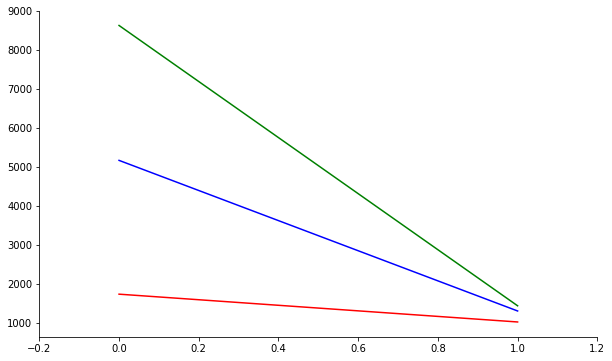

In [303]:
# Now we'll do the kmeans clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns

n_clusters = 3


fig, ax = plt.subplots(figsize=(10,6))
colours = ['red','blue','green']



# Fit kmeans model and plot the centroids
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_ooo)
for k, colour in zip(kmeans.cluster_centers_, colours):
    plt.plot(100*k,color=colour,label=colour)
  
  
xticks = ax.get_xticks()
plt.xticks(xticks, rotation='horizontal')

sns.despine()
plt.show()

KeyError: 'bikes'

station_id  bikes  spaces  total_docks  bike_lag  \
timestamp                                                               
2017-06-01 00:00:01           1      0      31           31         0   
2017-06-01 00:00:01          82     22       0           22         4   

                     bike_lag2  bike_lag3  bike_lag4  deposit  hour  \
timestamp                                                             
2017-06-01 00:00:01          0          0          0        0     0   
2017-06-01 00:00:01          4          4          4       18     0   

                     day_of_week  month  weekend  bike_pull4 Hour:Minute  
timestamp                                                                 
2017-06-01 00:00:01            3      6        0           0       00:00  
2017-06-01 00:00:01            3      6        0          22       00:00

In [354]:
dfPivot_mean = pd.pivot_table(df[df['day_of_week']==3], values = "bikes", aggfunc={'bikes': np.mean},
                                 columns = ["station_id"], index = "Hour:Minute")
dfPivot_mean = pd.pivot_table(df[df['day_of_week']==3 & (df['month']==6)], values = "bikes", aggfunc=np.mean,
                                 columns = ["station_id"], index = "Hour:Minute")
dfPivot_mean = pd.pivot_table(df[df['day_of_week']==3 & (df['month']==6)], values = "bikes", aggfunc=np.mean,
                                 columns = ["station_id"], index = "hour")


In [355]:
dfPivot_mean.head(2)

station_id       1         2         3          4          5         6    \
hour                                                                       
0           4.704014  7.975434  7.756141  10.870581  28.020971  8.452096   
1           4.509091  8.920000  7.923636  10.581818  28.304848  8.141212   

station_id        7         8         9         10     ...            102  \
hour                                                   ...                  
0           12.619162  8.799401  4.496407  6.575000    ...      14.877612   
1           12.264242  8.463636  4.259394  6.223457    ...      15.717576   

station_id       103       104       105        106    107        108   110  \
hour                                                                          
0           3.153846  3.615385  3.284615  11.207407  21.65  15.316667  20.8   
1           3.153846  3.615385  3.307692  11.444444  21.75  15.750000  21.5   

station_id   111        112  
hour                         
0           36.0  22.866667  
1           36.0  23.250000  

[2 rows x 111 columns]

In [357]:
dfPivot_mean.tail(2)

station_id       1          2         3         4          5         6    \
hour                                                                       
22          3.874691  11.780247  4.708642  5.901235  27.808642  3.990741   
23          3.300788  12.802911  4.463311  6.745907  25.458460  2.949060   

station_id        7         8         9         10     ...            102  \
hour                                                   ...                  
22          11.541975  3.559877  7.087654  3.037654    ...      16.511728   
23          11.052759  3.625834  5.359005  1.869012    ...      18.045482   

station_id       103       104       105        106        107        108  \
hour                                                                        
22          2.510256  2.169231  4.697436  14.844444  18.158333  15.158333   
23          2.692308  2.307692  4.930769  16.407407  19.683333  17.850000   

station_id       110        111        112  
hour                                        
22          7.233333  12.566667  24.950000  
23          7.966667  15.800000  26.891667  

[2 rows x 111 columns]

In [359]:
dfPivot_mean.to_csv('pivot_mean_hour.csv')

In [329]:
dfPivot_mean.to_csv('pivot_means_thursdays_aug.csv')

In [311]:
dfPivot_mean.to_csv('pivot_means_thursdays.csv')

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27900395 entries, 2017-06-01 00:00:01 to 2018-06-28 16:46:02
Data columns (total 15 columns):
station_id     int64
bikes          int64
spaces         int64
total_docks    int64
bike_lag       int64
bike_lag2      int64
bike_lag3      int64
bike_lag4      int64
deposit        int64
hour           int64
day_of_week    int64
month          int64
weekend        int64
bike_pull4     int64
Hour:Minute    object
dtypes: int64(14), object(1)
memory usage: 3.3+ GB


In [ ]:
np.

In [338]:
dfPivot_mean2 = pd.pivot_table(df, values = "bikes", 
                                 columns = ["station_id"], index = "Hour:Minute")


In [336]:
dfPivot_mean2.head(10)

station_id         1          2          3          4           5    \
Hour:Minute                                                           
00:00        60.072713  42.471516  33.109893  40.974214   98.936873   
00:02        59.296485  42.442973  33.084605  41.338521   98.759763   
00:04        58.927595  42.618843  33.409326  41.506380   99.613139   
00:06        58.595614  42.652823  33.512846  41.315460   99.942055   
00:08        57.699094  42.375949  33.261491  41.528430   99.832751   
00:10        57.419810  42.322020  33.220040  41.772034  100.786119   
00:12        56.706524  42.317682  32.735725  41.775368  101.290370   
00:14        55.999398  42.201042  32.601009  42.026027  100.710929   
00:16        55.676583  42.371476  32.908849  42.359787  100.563515   
00:18        54.707846  42.258455  32.299576  42.102288  100.549364   

station_id         6          7          8          9          10     ...      \
Hour:Minute                                                           ...       
00:00        44.297599  64.074601  60.357727  53.164210  31.641964    ...       
00:02        43.888250  63.930899  60.624843  53.007932  31.663582    ...       
00:04        43.884618  63.482923  60.940930  52.559585  31.235143    ...       
00:06        43.598921  63.711786  60.822321  51.571274  31.331042    ...       
00:08        43.691904  64.576937  60.321297  51.041183  31.383261    ...       
00:10        43.620316  64.665073  59.770347  50.725000  31.427219    ...       
00:12        43.570082  64.882757  59.987348  49.827021  31.292319    ...       
00:14        43.161479  64.870118  60.126039  48.721506  30.825473    ...       
00:16        42.617623  65.311379  59.881791  47.798621  30.855208    ...       
00:18        42.325045  65.564074  59.782303  47.185391  30.877695    ...       

station_id          102        103        104        105        106  \
Hour:Minute                                                           
00:00        102.851867  13.904161  19.991117  30.121552  51.325489   
00:02        102.126936  13.904161  19.991117  30.107527  51.773929   
00:04        102.855824  13.700561  19.991117  30.070126  51.773929   
00:06        103.073629  13.744039  19.991117  29.866293  51.765468   
00:08        103.823330  13.744039  19.911875  29.866293  51.776838   
00:10        103.909885  13.744039  19.911875  29.866293  51.470122   
00:12        104.396312  13.744039  19.911875  30.010051  50.620836   
00:14        104.687336  13.744039  19.911875  30.118747  50.645426   
00:16        104.712771  13.744039  19.911875  30.057737  50.358540   
00:18        104.515896  13.686770  19.911875  30.092099  50.930724   

station_id         107        108        110         111        112  
Hour:Minute                                                          
00:00        60.948718  47.430199  59.388889  167.410714  81.925926  
00:02        60.857550  47.430199  59.388889  167.410714  80.179487  
00:04        60.307692  46.102564  60.488889  167.410714  84.917379  
00:06        60.000000  46.102564  59.122222  167.428571  84.729345  
00:08        64.387464  45.464387  59.066667  167.428571  84.455840  
00:10        63.025641  44.507123  59.066667  167.428571  83.669516  
00:12        63.960114  44.076923  60.444444  163.714286  83.079772  
00:14        65.000000  44.019943  62.100000  167.125000  81.641026  
00:16        64.207977  44.019943  63.955556  167.125000  81.923077  
00:18        64.156695  43.396011  63.955556  167.428571  81.102564  

[10 rows x 111 columns]

In [337]:
dfPivot_mean2.tail(10)

station_id         1          2          3          4          5          6    \
Hour:Minute                                                                     
23:40        63.948213  42.855265  32.423336  39.232649  96.109925  46.290694   
23:42        63.501117  42.687040  32.439863  39.377242  96.666880  46.600929   
23:44        63.632575  42.686798  32.601925  39.554357  97.083453  46.059760   
23:46        63.324110  42.664262  32.455824  39.705753  97.617529  45.680398   
23:48        62.610768  42.509984  32.293601  39.746253  97.823931  45.455871   
23:50        62.262324  42.435045  31.979873  40.513801  97.803815  45.362445   
23:52        61.705249  42.365896  32.502543  40.336824  97.152435  45.375068   
23:54        61.589583  42.445892  32.711258  40.747325  98.514313  45.059747   
23:56        60.962977  42.463011  32.537117  40.894240  98.612805  44.759787   
23:58        60.555205  42.502019  32.737232  40.952830  98.803856  44.487861   

station_id         7          8          9          10     ...      \
Hour:Minute                                                ...       
23:40        64.484866  63.249344  60.218135  34.113598    ...       
23:42        64.573158  62.939587  59.611473  33.700573    ...       
23:44        64.604757  62.200289  58.720598  33.298429    ...       
23:46        64.479429  62.064006  58.248866  33.042527    ...       
23:48        64.006669  61.451393  57.910308  33.050013    ...       
23:50        64.728780  61.415012  57.068791  32.600591    ...       
23:52        64.804140  61.618506  56.458780  32.246169    ...       
23:54        64.588500  61.105774  55.643503  31.900428    ...       
23:56        64.197214  61.077074  54.444607  32.099285    ...       
23:58        64.306709  60.646020  53.856033  31.718371    ...       

station_id          102        103        104        105        106  \
Hour:Minute                                                           
23:40        102.117600  13.909771  19.955353  29.241935  51.244051   
23:42        101.641071  13.909771  19.955353  29.117345  50.759651   
23:44        101.650947  13.909771  19.955353  29.127162  50.603913   
23:46        101.574378  13.909771  19.955353  29.599112  51.358012   
23:48        101.627257  13.909771  19.955353  29.549088  51.164728   
23:50        102.668791  13.896213  19.955353  29.607527  52.027763   
23:52        102.445000  13.896213  19.955353  29.984572  51.030407   
23:54        103.014177  13.896213  19.955353  30.121552  51.489424   
23:56        103.177597  13.904161  19.955353  30.121552  51.522210   
23:58        102.842979  13.904161  19.991117  30.121552  51.408778   

station_id         107        108        110         111        112  
Hour:Minute                                                          
23:40        59.384615  47.284900  61.377778  129.714286  81.960114  
23:42        60.618234  46.794872  59.388889  129.714286  78.806268  
23:44        60.871795  46.883191  59.377778  132.696429  78.609687  
23:46        60.871795  48.267806  59.377778  143.142857  78.652422  
23:48        62.190883  48.267806  59.377778  156.571429  77.037037  
23:50        61.025641  48.267806  59.377778  165.410714  77.025641  
23:52        60.507123  48.225071  59.377778  166.125000  76.960114  
23:54        59.908832  48.225071  59.377778  166.125000  78.307692  
23:56        60.794872  47.849003  59.377778  165.714286  80.769231  
23:58        60.105413  47.430199  59.388889  162.214286  79.806268  

[10 rows x 111 columns]

In [ ]:
#& df['weekend']== 0

In [340]:
df.head(2)

station_id  bikes  spaces  total_docks  bike_lag  \
timestamp                                                               
2017-06-01 00:00:01           1      0      31           31         0   
2017-06-01 00:00:01          82     22       0           22         4   

                     bike_lag2  bike_lag3  bike_lag4  deposit  hour  \
timestamp                                                             
2017-06-01 00:00:01          0          0          0        0     0   
2017-06-01 00:00:01          4          4          4       18     0   

                     day_of_week  month  weekend  bike_pull4 Hour:Minute  
timestamp                                                                 
2017-06-01 00:00:01            3      6        0           0       00:00  
2017-06-01 00:00:01            3      6        0          22       00:00

In [350]:
len(df[ (df['station_id']==34) & (df['Hour:Minute']== '08:18') ])

381

In [353]:
df[ (df['station_id']==34) & (df['Hour:Minute']== '08:20') ].mean()

station_id     34.000000
bikes           5.901299
spaces         24.051948
total_docks    30.000000
bike_lag        5.992208
bike_lag2       6.093506
bike_lag3       6.192208
bike_lag4       6.210390
deposit        -0.090909
hour            8.000000
day_of_week     2.984416
month           6.516883
weekend         0.283117
bike_pull4      5.397403
dtype: float64

In [367]:
dfPivot_means = pd.pivot_table(df, values = "bikes", aggfunc={'bikes': np.mean},
                             columns = "station_id", index = "hour")


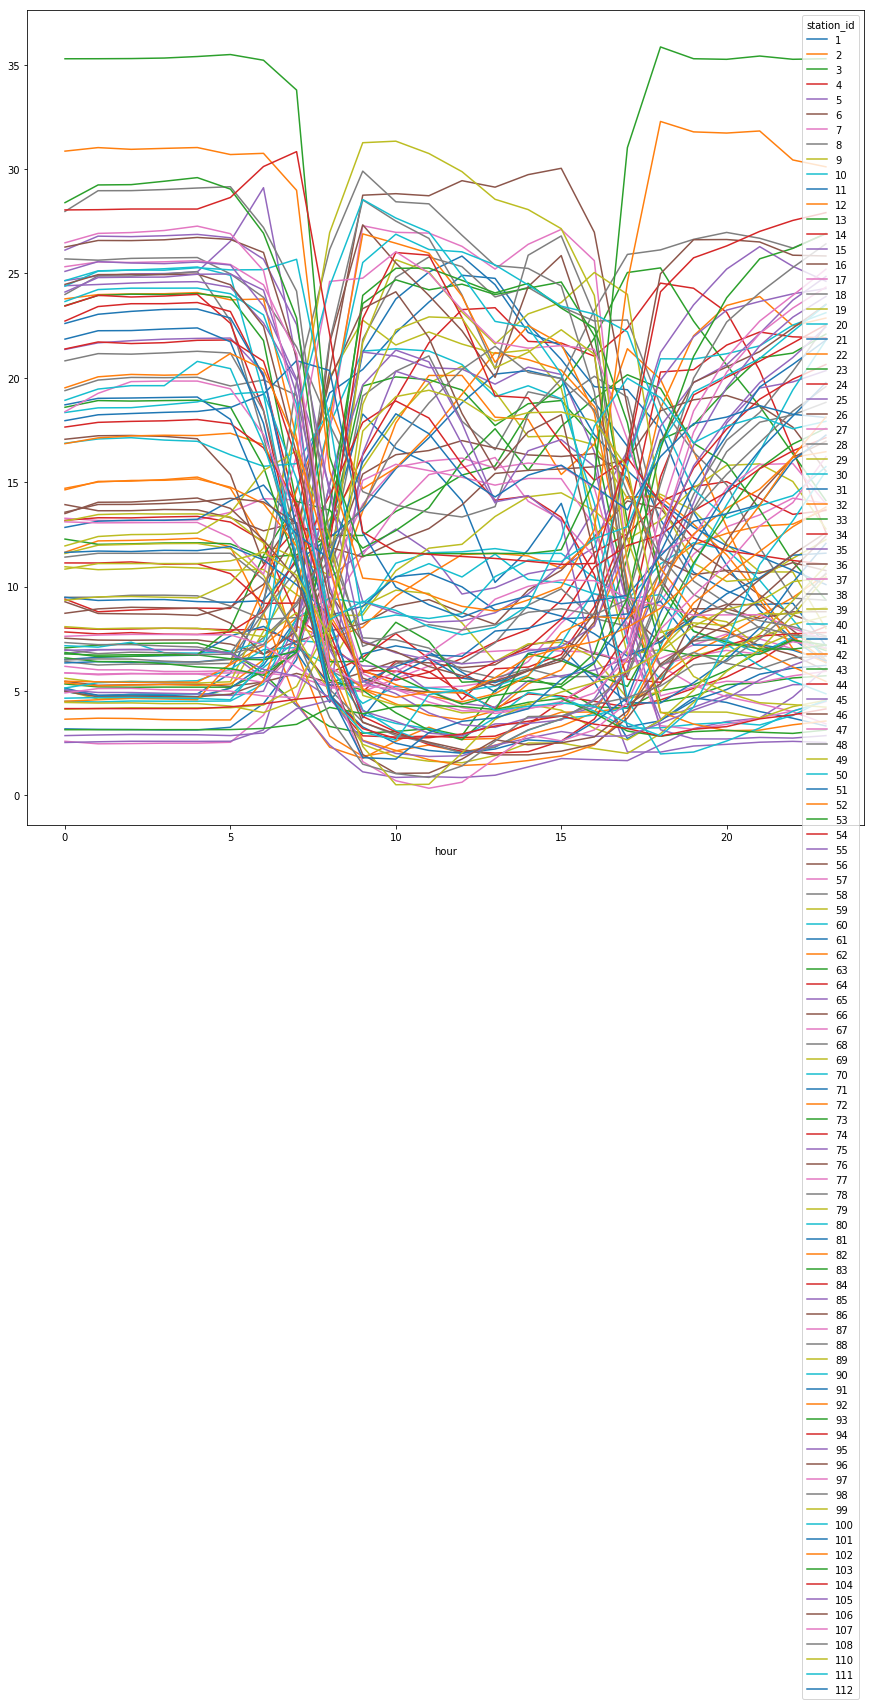

In [371]:
dfPivot_means.plot(subplots = False, figsize=(15, 15))

In [370]:
dfPivot_means.head()

station_id       1          2         3         4          5         6    \
hour                                                                       
0           5.129940  11.643541  7.060747  8.013892  24.657693  5.457463   
1           4.759218  12.186169  7.190756  7.950407  24.891812  5.266228   
2           4.833566  12.210227  7.262587  7.963811  24.977622  5.290822   
3           4.854369  12.249393  7.285974  8.000607  24.996273  5.322555   
4           4.854331  12.312581  7.293766  7.980491  25.078904  5.322986   

station_id        7         8         9         10     ...            102  \
hour                                                   ...                  
0           13.271009  6.406471  5.014324  4.965910    ...      19.522751   
1           13.167388  6.238532  4.608188  4.738050    ...      20.048941   
2           13.153671  6.284091  4.666171  4.831806    ...      20.163804   
3           13.181952  6.276699  4.661755  4.844575    ...      20.127238   
4           13.192665  6.285268  4.643631  4.863585    ...      20.158046   

station_id       103       104       105        106        107        108  \
hour                                                                        
0           3.138401  4.150592  6.941556  13.496503  18.379481  11.409147   
1           3.139785  4.150538  6.978495  14.038172  19.256790  11.592593   
2           3.139785  4.150538  6.978495  14.048387  19.819753  11.592593   
3           3.140911  4.152026  6.979204  14.138246  19.846724  11.590853   
4           3.139785  4.150538  6.978495  14.241935  19.844444  11.592593   

station_id        110      111        112  
hour                                       
0           10.833333  18.9250  22.605686  
1           11.100000  19.4625  23.045679  
2           11.100000  19.6250  23.185185  
3           11.100000  19.6250  23.279357  
4           11.100000  20.7875  23.296296  

[5 rows x 111 columns]